##**Introducción:**

Este proyecto tiene como objetivo desarrollar las habilidades necesarias para la limpieza y exploración de datos. Un principio fundamental que se aplicó fue evitar la eliminación inmediata de columnas o registros, siempre que fuera posible calcular los valores faltantes. En este análisis, se buscaron patrones que permitieran inferir dichos datos en lugar de descartarlos. Considero que es crucial que el analista cuente con un criterio sólido para decidir cuándo modificar o, en su defecto, eliminar información.

Como colaborador del proyecto, Carlos David Ramírez Ospina, debo mencionar que, en este caso —y como puede suceder en muchos otros análisis—, no se encontraron patrones claramente relevantes para imputar todos los datos. Inicialmente, teníamos expectativas altas: al ser el proyecto final del curso de Análisis de Datos (Básico) auspiciado por el Ministerio de las TIC, mi compañero y yo decidimos asumir un reto significativo. Aunque era nuestro primer análisis, escogimos una base de datos extensa, tomada de los datos abiertos del gobierno colombiano: https://www.datos.gov.co/Estad-sticas-Nacionales/Colombianos-en-elexterior-de-25-a-40-a-os/3k8j-4d42 (Colombianos en el exterior de 25 a 40 años). Inicialmente, tomamos la base de datos con alrededor de 1.700.000 registros, ya que existía otro data set con aproximadamente 560.000 registros. Sin embargo, al desconocer los motivos por los cuales el "autor" descartó cerca de 1.200.000 datos, decidimos utilizar la base que consideramos original para realizar un análisis posterior según nuestro propio criterio.

Fue evidente el uso de inteligencia artificial como herramienta de apoyo, especialmente en situaciones de alta complejidad, como el reemplazo de caracteres desconocidos o el cálculo de promedios para imputar valores nulos en función de otras columnas. Como Ingeniero Electrónico en proceso final de formación, estoy convencido de que la IA resultó necesaria en momentos donde, a pesar de identificar teóricamente una posible solución, no lograba materializarla por falta de experiencia práctica. Si bien el análisis que se presenta aquí está culminado, detrás hubo un proceso arduo y de mucho aprendizaje.

Con el ánimo de presentar este trabajo como un escalón hacia la empleabilidad en el campo del análisis de datos, se realizaron ajustes finales, como la redacción de descripciones más detalladas y esta misma introducción, que no estaban presentes en el documento original de Google Colab.


Agradecimientos a:

Profesor, Ing. Jonathan Giraldo, por su acompañamiento, paciencia y pasión por la enseñanza.

Mentor, Ing. Nilson Olaya, por su incondicional asesoría.

Monitor, Ing. Esteban Arias, por compartirnos de su valiosa experiencia.

Compañero de proyecto, Ing. Marcos Beltrán, por su confianza.

PARTE #1
Limpieza Inicial del set de datos la cual incluye:
1. Importación de bibliotecas necesarias.
2. Visualización por medio del metodo ".head()", para ver el contenido del data set.
3. Visualización de la columna "Edades (años)" con valores de registros mayores a 90.
4. Eliminación de valores de registros mayores a 90 en la columna "Edades (años)"
5. Visualización de "Cantidad de personas" con valores en registros mayores a 1.
6. Eliminación de registros hallados según el punto anterior.
7. Eliminación de la columna "Estatura (CM)".
8. Revisión de datos nulos y/o duplicados.
9. Búsqueda de registros con caracter especial "�".
10. Modifcación de registros con caracter especial.
11. Búsqueda de registros en la columna "Edades (años)" con valores iguales a -1.
12. Asignación de valores nulos para registros hallados en el punto 11.
13. Se debe modificar la columna "Grupo edad" en los espacios donde sea igual a "DESCONOCIDO".
14. Modificación de tipo de dato de "Fecha de Registro" y eliminación de valores atípicos.
15. Se visualiza finalmente el set de datos posterior a su limpieza.
16. Se justifica y se selecciona el rango de edades el cual se va a analizar.
17.Se evidencia el total de las filas que se limpiaron.
18. Se exporta el set de datos posterior a su limpieza.


PARTE #2
Selección de rango de edades y graficación de las mismas.


1. **Importación de bibliotecas necesarias:**

* *google.colab: Permite a Google Colab interactuar con tu Google Drive para cargar archivos.*

* *pandas: Es la principal herramienta para manejar y analizar datos en tablas, como DataFrames.*

* *matplotlib.pyplot: Se utiliza para crear gráficos y visualizaciones estáticas.*

* *seaborn: Proporciona una interfaz más atractiva y de alto nivel para hacer visualizaciones estadísticas.*
* *numpy: Es la base para cálculos numéricos avanzados, especialmente con arrays.*


In [1]:
# Importa las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from google.colab import drive, data_table

data_table.enable_dataframe_formatter()
drive.mount('/content/drive')
!pip install pyarrow

file_path_parquet = '/content/drive/MyDrive/Bases de Datos/colombianos_exterior.parquet'

df = pd.read_parquet(file_path_parquet, engine='pyarrow')
print("DataFrame cargado exitosamente desde el archivo Parquet.")

display(df.head())

Mounted at /content/drive
DataFrame cargado exitosamente desde el archivo Parquet.


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas
0,CHILE,CHL,TARAPACA/IQUIQUE,C. ANTOFAGASTA,ADULTO,45,NO INDICA,NO INDICA,BACHILLERATO,SOLTERO,FEMENINO,SIN ETNIA REGISTRADA,165,COLOMBIA/VALLE DEL CAUCA/BUENAVENTURA,"(-35.675147, -71.542969)",2015-08,2
1,VENEZUELA,VEN,CARABOBO/BEJUMA,C. VALENCIA VEN,ADULTO MAYOR,68,NINGUNA,NINGUNA,NO INDICA,CASADO,MASCULINO,OTRO,-1,COLOMBIA/SANTANDER/BUCARAMANGA,"(6.42375, -66.58973)",2017-09,1
2,CHILE,CHL,COQUIMBO/OVALLE,C. SANTIAGO,ADULTO,32,NINGUNA,NINGUNA,NO INDICA,CASADO,FEMENINO,NINGUNA,-1,COLOMBIA/VALLE DEL CAUCA/CALI,"(-35.675147, -71.542969)",2021-04,1
3,ESPA�A,ESP,CANTABRIA/SANTANDER,C. BILBAO,ADULTO,45,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,FEMENINO,OTRO,-1,COLOMBIA/HUILA/NEIVA,"(40.463667, -3.74922)",2023-07,1
4,MEXICO,MEX,NUEVO LEON/MONTERREY,C. MEXICO,ADOLESCENTE,16,NINGUNA,NINGUNA,NO INDICA,SOLTERO,MASCULINO,NINGUNA,-1,COLOMBIA/ATLANTICO/BARRANQUILLA,"(23.634501, -102.552784)",2017-07,1


##**2. Visualización por medio del metodo ".head()", para ver el contenido del data set.**


In [2]:
df.head().T

,0,1,2,3,4
País,CHILE,VENEZUELA,CHILE,ESPA�A,MEXICO
Código ISO país,CHL,VEN,CHL,ESP,MEX
Ciudad de Residencia,TARAPACA/IQUIQUE,CARABOBO/BEJUMA,COQUIMBO/OVALLE,CANTABRIA/SANTANDER,NUEVO LEON/MONTERREY
Oficina de registro,C. ANTOFAGASTA,C. VALENCIA VEN,C. SANTIAGO,C. BILBAO,C. MEXICO
Grupo edad,ADULTO,ADULTO MAYOR,ADULTO,ADULTO,ADOLESCENTE
Edad (años),45,68,32,45,16
Área Conocimiento,NO INDICA,NINGUNA,NINGUNA,NINGUNA,NINGUNA
Sub Area Conocimiento,NO INDICA,NINGUNA,NINGUNA,NINGUNA,NINGUNA
Nivel Académico,BACHILLERATO,NO INDICA,NO INDICA,BACHILLERATO,NO INDICA
Estado civil,SOLTERO,CASADO,CASADO,SOLTERO,SOLTERO


##**3. Visualización de la columna "Edad (años)" con valores de registros mayores a 90.**

In [3]:
conteo_mayores_90 = df[df["Edad (años)"]>90]["Edad (años)"].value_counts().sum()
total_personas = len(df)
porcentaje_mayores_90 = (conteo_mayores_90 / total_personas) * 100
display(df[df["Edad (años)"]>90]["Edad (años)"].value_counts().T)

print("----------------------------------------------------------------------------------")

print("El total de personas mayores de 90 años es:", conteo_mayores_90)
print("El total de personas en el set de datos inicial es:", total_personas)
print(f"El total de personas mayores de 90 años, representan el {porcentaje_mayores_90:.2f}% del set de datos inicial")

,count
Edad (años),
91,1247
92,1005
93,837
94,690
95,683
96,565
97,428
98,303
99,227


----------------------------------------------------------------------------------
El total de personas mayores de 90 años es: 6835
El total de personas en el set de datos inicial es: 1747917
El total de personas mayores de 90 años, representan el 0.39% del set de datos inicial


##**4. Eliminación de valores de registros mayores a 90 en la columna "Edades (años)".**


In [4]:
df1 = df[df["Edad (años)"] <= 90]


##**5. Visualización de "Cantidad de personas" con valores en registros mayores a 1.**

In [5]:
df1[df1["Cantidad de personas"]>1]["Cantidad de personas"].value_counts()

,count
Cantidad de personas,
2,9602
3,1137
4,408
5,156
6,78
7,36
8,17
9,15
10,6


##**6. Eliminación de registros hallados según el punto anterior.**

In [6]:
df2 = df1[df1["Cantidad de personas"] <= 1]

##**7. Eliminación de la columna "Estatura (CM)".**

In [18]:
df2.drop("Estatura (CM)", axis=1, inplace=True)

/tmp/ipython-input-4201232995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop("Estatura (CM)", axis=1, inplace=True)


##**8. Revisión de datos nulos y/o duplicados.**

In [7]:
print("El total de datos nulos es: ",df2.isnull().sum())
print("El total de datos duplicados es: ",df2.duplicated().sum())

El total de datos nulos es:  País                     0
Código ISO país          0
Ciudad de Residencia     0
Oficina de registro      0
Grupo edad               0
Edad (años)              0
Área Conocimiento        0
Sub Area Conocimiento    0
Nivel Académico          0
Estado civil             0
Género                   0
Etnia de la persona      0
Estatura (CM)            0
Ciudad de Nacimiento     0
Localización             0
Fecha de Registro        0
Cantidad de personas     0
dtype: int64
El total de datos duplicados es:  0


##**8.1. Se eliminan datos duplicados.**

In [8]:
df2.drop_duplicates(inplace=True)

/tmp/ipython-input-3008726784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


##**9. Búsqueda de registros con caracter especial "�".**

In [9]:
palabras_con_caracter_especial = []

# Iterar sobre las columnas de tipo objeto en el DataFrame df1
for columna in df2.select_dtypes(include=['object']).columns:
    # Obtener todos los valores únicos de la columna
    valores_unicos = df2[columna].unique()

    # Iterar sobre los valores únicos
    for valor in valores_unicos:
        # Asegurarse de que el valor no sea nulo y sea una cadena de texto
        if isinstance(valor, str):
            # Buscar palabras que contengan el carácter "�"
            # Utilizamos una expresión regular para encontrar palabras (secuencias de caracteres no espaciados)
            # que contengan el carácter "�"
            palabras_encontradas = re.findall(r'\S*�\S*', valor)

            # Agregar las palabras encontradas a la lista principal
            palabras_con_caracter_especial.extend(palabras_encontradas)

# Obtener las palabras únicas de la lista
palabras_unicas_con_caracter_especial = list(set(palabras_con_caracter_especial))

# Imprimir la lista de palabras únicas
print("Palabras que contienen el carácter '�':")
print(palabras_unicas_con_caracter_especial)

Palabras que contienen el carácter '�':
['COLOMBIA/NARI�O/QUITOSO', 'CATALU�A/TARROJA', 'GUIP�ZCOA/OIARZUN', 'BIOM�DICA', 'TACHIRA/FERN�NDEZ', 'MANCHA/VALDEPE�AS', 'CATALU�A/COLLBATO', 'CATALU�A/SILS', 'LAN/S�DERT�LJE', 'TEMPELHOF-SCH�NEBERG', 'ESPA�A/CATALU�A/FONTCOBERTA', 'TECNOL�GICA', 'ESPA�A/ANDALUCIA/ESTEPONA', 'ESPA�A/ANDALUCIA/HUELVA', 'GUAJIRA/CA�AVERALES', 'ESPA�A/NAVARRA/BERRIOPLANO', 'ENFERMER�A', 'CATALU�A/PARLABA', 'ESPA�A/NAVARRA/VIANA', 'HESSEN/H�TTENBERG', 'ESPA�A/VALENCIA/ALBAL', 'ESPA�A/ARAGON/MONZON', 'CATALU�A/NAVA', 'SANTANDER/OCA�A', 'CARCHI/TUFI�O', 'ESPA�A/EXTREMADURA/MERIDA', 'CATALU�A/CORSA', 'PL�STICAS,', 'ESPA�A/ANDALUCIA/CADIZ-ESPA�A', 'BERN/L�NGENB�HL', 'CABEZ�N,', 'CATALU�A/PONTS', 'CATALU�A/FIGUERAS', 'CATALU�A/BADALONA', 'ADMINISTRACI�N', 'CATALU�A/MONTGAT', 'GALICIA/CORU�A', 'ESPA�A/VIZCAYA/IRUN', 'MANCHA/CABA�AS', 'CATALU�A/FIGUEROSA', 'EL�CTRICA', 'ESPA�A/GALICIA/CEDEIRA', 'CATALU�A/SORT', 'ESPA�A/ANDALUCIA/VELEZ', 'CATALU�A/CUBELLA', 'RIOJA/LOGRO�O

##**10. Modifcación de registros con caracter especial.**

In [10]:
# Diccionario COMBINADO Y ACTUALIZADO de reemplazos para corregir las palabras con el carácter '�'
reemplazos_final = {
    'CATALU�A': 'CATALUÑA',
    'ESPA�A': 'ESPAÑA',
    'GUIP�ZCOA': 'GUIPUZCOA',
    'RIOJA/LOGRO�O': 'RIOJA/LOGROÑO',
    'COLOMBIA/BOLIVAR/PE�ONCITO': 'COLOMBIA/BOLIVAR/PEÑONCITO',
    'MEC�NICA': 'MECÁNICA',
    'ESPA�OL': 'ESPAÑOL',
    'BRETA�A': 'BRETAÑA',
    'LING��STICA': 'LINGÜÍSTICA',
    'COLOMBIA/CUNDINAMARCA/BOGOT�': 'COLOMBIA/CUNDINAMARCA/BOGOTÁ',
    'COLOMBIA/CESAR/SIMA�A': 'COLOMBIA/CESAR/SIMAÑA',
    'CORU�A-ORDES': 'CORUÑA-ORDES',
    'MANCHA/VALDEPE�AS': 'MANCHA/VALDEPEÑAS',
    'NAVARRA/BARA�AIN': 'NAVARRA/BARAÑAIN',
    'CANTABRIA/PI�LAGOS': 'CANTABRIA/PIÉLAGOS',
    'VENEZUELA/TACHIRA/PI�AL': 'VENEZUELA/TACHIRA/PIÑAL',
    'LE�A': 'LEÑA',
    'CANTABRIA/ARGO�OS': 'CANTABRIA/ARGOÑOS',
    'COLOMBIA/BOLIVAR/�ANGUMA': 'COLOMBIA/BOLIVAR/ANGÚMA', # Asumiendo ANGÚMA, verificar si es correcto
    'GUIP�ZCOA/URNIETA': 'GUIPUZCOA/URNIETA',
    'VENEZUELA/TACHIRA/MONSE�OR': 'VENEZUELA/TACHIRA/MONSEÑOR',
    'BRASIL/MARANHAO/S�O': 'BRASIL/MARANHAO/SÃO',
    'COLOMBIA/CUNDINAMARCA/PE�ON': 'COLOMBIA/CUNDINAMARCA/PEÑON',
    'MIL�N/ROZZANO': 'MILÁN/ROZZANO',
    'BADEN-WURTTEMBERG/SCHW�BISCH': 'BADEN-WURTTEMBERG/SCHWÄBISCH',
    'CATARINA/TUBAR�O': 'CATARINA/TUBARÃO',
    'NUTRICI�N': 'NUTRICIÓN',
    'ASTURIAS/CARRE�O': 'ASTURIAS/CARREÑO',
    'EG�ES': 'EGÜES',
    'TEOLOG�A': 'TEOLOGÍA',
    'BERLIN/BERL�N': 'BERLIN/BERLÍN',
    'ANTROPOLOG�A': 'ANTROPOLOGÍA',
    'MANCHA/CABA�AS': 'MANCHA/CABAÑAS',
    'LODZKIE/WOLB�RZ': 'LODZKIE/WOLBÓRZ',
    'COLOMBIA/MAGDALENA/PIJI�O': 'COLOMBIA/MAGDALENA/PIJIÑO',
    'RORAIMA/RORAIN�POLIS': 'RORAIMA/RORAINÓPOLIS',
    'VAUD/PR�VERENGES': 'VAUD/PRÉVERENGES',
    'NORDRHEIN-WESTFALEN/M�LHEIM': 'NORDRHEIN-WESTFALEN/MÜLHEIM',
    'PSICOLOG�A': 'PSICOLOGÍA',
    'COLOMBIA/CORDOBA/CA�O': 'COLOMBIA/CORDOBA/CAÑO',
    'INFORMACI�N': 'INFORMACIÓN',
    'RIOJA/BA�OS': 'RIOJA/BAÑOS',
    'COLOMBIA/CAUCA/CAJIB�O': 'COLOMBIA/CAUCA/CAJIBÍO',
    'OR/CH�TILLON-SUR-SEINE': 'OR/CHÂTILLON-SUR-SEINE',
    'AARGAU/W�RENLOS': 'AARGAU/WÖRENLOS',
    'MIL�N/MILAN': 'MILÁN/MILAN',
    'MERIDA/CA�O': 'MERIDA/CAÑO',
    'VENEZUELA/TACHIRA/CA�O': 'VENEZUELA/TACHIRA/CAÑO',
    'BADEN-WURTTEMBERG/K�SSABERG-RHEINHEIM': 'BADEN-WURTTEMBERG/KÜSSABERG-RHEINHEIM',
    'SCHLESWIG-HOLSTEIN/SCH�NBERG': 'SCHLESWIG-HOLSTEIN/SCHÖNBERG',
    'ANDALUCIA/PE�ARROYA-PUEBLONUEVO': 'ANDALUCIA/PEÑARROYA-PUEBLONUEVO',
    'SCHLESWIG-HOLSTEIN/L�BECK': 'SCHLESWIG-HOLSTEIN/LÜBECK',
    'PICHINCHA/I�AQUITO-QUITO': 'PICHINCHA/IÑAQUITO-QUITO',
    'VIZCAYA/ABADI�O': 'VIZCAYA/ABADIÑO',
    'CORU�A,': 'CORUÑA,',
    'OPTOMETR�A': 'OPTOMETRÍA',
    'TR�PAGA': 'TRÁPAGA',
    'COR�': 'CORÓ',
    'ARAGON/SABI�ANIGO': 'ARAGON/SABIÑANIGO',
    'AARGAU/NIEDERG�SGEN': 'AARGAU/NIEDERGÖSGEN',
    'ECUADOR/PICHINCHA/RUMI�AHUI': 'ECUADOR/PICHINCHA/RUMIÑAHUI',
    'POMORSKIE/BYT�W': 'POMORSKIE/BYTÓW',
    'MAR�A': 'MARÍA',
    'WESTFALIA/D�SSELDORF': 'WESTFALIA/DÜSSELDORF',
    'TECNOLOG�A': 'TECNOLOGÍA',
    'BAYERN/ALT�TTING': 'BAYERN/ALTÖTTING',
    'VALENCIANA/PE�ISCOLA': 'VALENCIANA/PEÑISCOLA',
    'LODZKIE/WIERUSZ�W': 'LODZKIE/WOLBÓRZ',
    'COLOMBIA/MAGDALENA/PIJI�O': 'COLOMBIA/MAGDALENA/PIJIÑO',
    'RORAIMA/RORAIN�POLIS': 'RORAIMA/RORAINÓPOLIS',
    'VAUD/PR�VERENGES': 'VAUD/PRÉVERENGES',
    'NORDRHEIN-WESTFALEN/M�LHEIM': 'NORDRHEIN-WESTFALEN/MÜLHEIM',
    'PSICOLOG�A': 'PSICOLOGÍA',
    'COLOMBIA/CORDOBA/CA�O': 'COLOMBIA/CORDOBA/CAÑO',
    'INFORMACI�N': 'INFORMACIÓN',
    'RIOJA/BA�OS': 'RIOJA/BAÑOS',
    'COLOMBIA/CAUCA/CAJIB�O': 'COLOMBIA/CAUCA/CAJIBÍO',
    'OR/CH�TILLON-SUR-SEINE': 'OR/CHÂTILLON-SUR-SEINE',
    'AARGAU/W�RENLOS': 'AARGAU/WÖRENLOS',
    'MIL�N/MILAN': 'MILÁN/MILAN',
    'MERIDA/CA�O': 'MERIDA/CAÑO',
    'VENEZUELA/TACHIRA/CA�O': 'VENEZUELA/TACHIRA/CAÑO',
    'BADEN-WURTTEMBERG/K�SSABERG-RHEINHEIM': 'BADEN-WURTTEMBERG/KÜSSABERG-RHEINHEIM',
    'SCHLESWIG-HOLSTEIN/SCH�NBERG': 'SCHLESWIG-HOLSTEIN/SCHÖNBERG',
    'ANDALUCIA/PE�ARROYA-PUEBLONUEVO': 'ANDALUCIA/PEÑARROYA-PUEBLONUEVO',
    'SCHLESWIG-HOLSTEIN/L�BECK': 'SCHLESWIG-HOLSTEIN/LÜBECK',
    'PICHINCHA/I�AQUITO-QUITO': 'PICHINCHA/IÑAQUITO-QUITO',
    'VIZCAYA/ABADI�O': 'VIZCAYA/ABADIÑO',
    'CORU�A,': 'CORUÑA,',
    'OPTOMETR�A': 'OPTOMETRÍA',
    'TR�PAGA': 'TRÁPAGA',
    'COR�': 'CORÓ',
    'ARAGON/SABI�ANIGO': 'ARAGON/SABIÑANIGO',
    'AARGAU/NIEDERG�SGEN': 'AARGAU/NIEDERGÖSGEN',
    'ECUADOR/PICHINCHA/RUMI�AHUI': 'ECUADOR/PICHINCHA/RUMIÑAHUI',
    'POMORSKIE/BYT�W': 'POMORSKIE/BYTÓW',
    'MAR�A': 'MARÍA',
    'WESTFALIA/D�SSELDORF': 'WESTFALIA/DÜSSELDORF',
    'TECNOLOG�A': 'TECNOLOGÍA',
    'BAYERN/ALT�TTING': 'BAYERN/ALTÖTTING',
    'VALENCIANA/PE�ISCOLA': 'VALENCIANA/PEÑISCOLA',
    'LODZKIE/WIERUSZ�W': 'LODZKIE/WIERUSZÓW',
    'COLOMBIA/MAGDALENA/PE�ONCITO': 'COLOMBIA/MAGDALENA/PEÑONCITO',
    'GON�ALO': 'GONÇALO',
    'SUIZA/THURGAU/M�NSTERLINGEN': 'SUIZA/THURGAU/MÜNSTERLINGEN',
    'BIBLIOTECOLOG�A': 'BIBLIOTECOLOGÍA',
    'CASTELL�N/VINAROS': 'CASTELLÓN/VINAROS',
    'LAN/STR�NGN�S': 'LAN/STRÄNGNÄS',
    'CATALU�A/ALCARRAZ': 'CATALUÑA/ALCARRAZ',
    'LAN/�STERSUND': 'LAN/ÖSTERSUND',
    'CASTELL�N/BENICASIM': 'CASTELLÓN/BENICASIM',
    'LLAGOSTERA�': 'LLAGOSTERA', # Asumiendo que el carácter está al final por error
    'GUIP�ZCOA/ARETXABALETA': 'GUIPUZCOA/ARETXABALETA',
    'PSICOLOG�A': 'PSICOLOGÍA',
    'CATALU�A/SANTPEDOR': 'CATALUÑA/SANTPEDOR',
    'CIENCIAS DE LA COMUNICACI�N': 'CIENCIAS DE LA COMUNICACIÓN',
    'CATALU�A/GUIMERA': 'CATALUÑA/GUIMERA',
    'CATALU�A/BOSSOST': 'CATALUÑA/BOSOST',
    'CATALU�A/TORRELAMEO': 'CATALUÑA/TORRELAMEO',
    'CORU�A': 'CORUÑA',
    'LU�S': 'LUÍS',
    'CARRE�O': 'CARREÑO',
    'ITALIA/MIL�N/ROZZANO': 'ITALIA/MILÁN/ROZZANO',
    'COLOMBIA/CORDOBA/MO�ITOS': 'COLOMBIA/CORDOBA/MOÑITOS',
    'VENEZUELA/TACHIRA/URE�A': 'VENEZUELA/TACHIRA/UREÑA',
    'COLOMBIA/ATLANTICO/PIOJ�': 'COLOMBIA/ATLANTICO/PIOJÓ',
    'LAN/MALM�': 'LAN/MALMÖ',
    'ESPAÑA/VIZCAYA/GUE�ES': 'ESPAÑA/VIZCAYA/GUEÑES',
    'LAN/LINK�PING': 'LAN/LINKÖPING',
    'VENEZUELA/BOLIVAR/CEDE�O': 'VENEZUELA/BOLIVAR/CEDEÑO',
    'CASTELL�N/ONDA': 'CASTELLÓN/ONDA',
    'VICEN�': 'VICENÇ',
    'JULI�N': 'JULIÁN',
    'AIRES/CA�UELAS': 'AIRES/CAÑUELAS',
    'ESPECIALIZACI�N': 'ESPECIALIZACIÓN',
    'PIR�RA': 'PIRARA', # Asumiendo que no lleva tilde
    'AGR�COLA,': 'AGRÍCOLA,',
    'BAK�': 'BAKÚ',
    'LAN/T�BY': 'LAN/TÄBY',
    'ESPAÑA/CATALU�A/GUALBA': 'ESPAÑA/CATALUÑA/GUALBA',
    'COLOMBIA/BOYACA/BRICE�o': 'COLOMBIA/BOYACA/BRICEÑO', # Corregido
    'PERNAMBUCO/JABOAT�o': 'PERNAMBUCO/JABOATÃO', # Corregido
    'ESPAÑA/CATALU�a/SEO': 'ESPAÑA/CATALUÑA/SEO', # Corregido
    'WARMINSKO-MAZURSKIE/OSTR�da': 'WARMINSKO-MAZURSKIE/OSTRÓDA', # Corregido
    'COL�n/COLON': 'COLÓN/COLON', # Corregido
    "QUEBEC/NOTRE-DAME-DE-L'�LE-PERROT": "QUEBEC/NOTRE-DAME-DE-L'ÎLE-PERROT",
    'MADRID/FUENTIDUE�a': 'MADRID/FUENTIDUEÑA', # Corregido
    'ARAGON/SARI�ena': 'ARAGON/SARIÑENA', # Corregido
    'LEON/FUENSALDA�a': 'LEON/FUENSALDAÑA', # Corregido
    'COLOMBIA/ANTIOQUIA/PE�OL': 'COLOMBIA/ANTIOQUIA/PEÑOL',
    'COLOMBIA/ANTIOQUIA/BRICE�O': 'COLOMBIA/ANTIOQUIA/BRICEÑO',
    'POL�TICA': 'POLÍTICA',
    'IND�GENA': 'INDÍGENA',
    'VOJVODINA/KRU�evac': 'VOJVODINA/KRUŠEVAC', # Corregido
    'BRETA�a/BIRMINGHAM/BIRMINGHAM': 'BRETAÑA/BIRMINGHAM/BIRMINGHAM', # Corregido
    'ILE-DE-FRANCE/L�HAY-': 'ILE-DE-FRANCE/L\'HAY-', # Asumiendo L'HAY-
    'ESPAÑA/MADRID/COBE�a': 'ESPAÑA/MADRID/COBEÑA', # Corregido
    'AARGAU/M�hlin': 'AARGAU/MÜHLIN', # Corregido
    'LIMA/CA�ete': 'LIMA/CAÑETE', # Corregido
    'NIEDEROSTERREICH/GRO�-ENZERSDORF': 'NIEDEROSTERREICH/GROSS-ENZERSDORF', # Asumiendo SS
    'FR�lunda': 'FRÖLUNDA', # Corregido
    'ESPLUGA�': 'ESPLUGA', # Asumiendo que el carácter está al final por error
    'AUVERGNE-RH�NE-ALPES/RILLIEUX-LA-PAPE': 'AUVERGNE-RHÔNE-ALPES/RILLIEUX-LA-PAPE',
    'MONT-P�LERIN': 'MONT-PÈLERIN', # Corregido
    'COLOMBIA/BOLIVAR/CA�O': 'COLOMBIA/BOLIVAR/CAÑO',
    'R�OS': 'RÍOS',
    'CANTABRIA/SANTO�a': 'CANTABRIA/SANTOÑA', # Corregido
    'LAN/K�VLINGE': 'LAN/KÄVLINGE', # Corregido
    'AUVERGNE-RH�NE-ALPES/SAINT': 'AUVERGNE-RHÔNE-ALPES/SAINT',
    'TUFI�o': 'TUFIÑO', # Corregido
    'CANTABRIA/VIO�o': 'CANTABRIA/VIOÑO', # Corregido
    "ESPAÑA/CATALU�a/L'HOSPITALET": "ESPAÑA/CATALUÑA/L'HOSPITALET", # Corregido
    'HESSEN/H�TTENBERG': 'HESSEN/HÜTTENBERG', # Corregido
    'LAN/V�STERVIK': 'LAN/VÄSTERVIK', # Corregido
    'MARANH�O': 'MARANHÃO', # Corregido
    'GUIP�ZCOA/O�ati': 'GUIPUZCOA/OÑATI', # Corregido
    'TACHIRA/PI�AL': 'TACHIRA/PIÑAL',
    'VIZCAYA/GUE�es': 'VIZCAYA/GUEÑES', # Corregido
    'SUIZA/ZURICH/B�LACH': 'SUIZA/ZURICH/BÜLACH', # Corregido
    'QUEBEC/SAINT-Ren�': 'QUEBEC/SAINT-RENÉ', # Corregido
    '��������������������������������': '', # Reemplazar con cadena vacía o NaN si es un valor inválido completo
    'CABEZ�n,': 'CABEZÓN,', # Corregido
    'LAN/V�xj�': 'LAN/VÄXJÖ', # Corregido
    'LODZKIE/WOLB�rz': 'LODZKIE/WOLBÓRZ', # Corregido
    'GUIP�ZCOA/LEGORRETA': 'GUIPUZCOA/LEGORRETA',
    'VENEZUELA/BARINAS/CA�O': 'VENEZUELA/BARINAS/CAÑO',
    'CATALU�a/VAQUEIRA-BERET': 'CATALUÑA/VAQUEIRA-BERET', # Corregido
    'BRETA�a/LONDRES/MANCHESTER': 'BRETAÑA/LONDRES/MANCHESTER', # Corregido
    'GUIP�ZCOA/ZARAUZ': 'GUIPUZCOA/ZARAUZ',
    'ESPAÑA/CASTELL�n/ONDA': 'ESPAÑA/CASTELLÓN/ONDA', # Corregido
    'TUNGURAHUA/BA�os': 'TUNGURAHUA/BAÑOS', # Corregido
    'ESPAÑA/GUIP�ZCOA/ORIO': 'ESPAÑA/GUIPUZCOA/ORIO',
    'COLOMBIA/CAQUETA/MONTA�ita': 'COLOMBIA/CAQUETA/MONTAÑITA', # Corregido
    "DE(TAIW�n)/T'AI-WAN/CHANG": "DE(TAIWÁN)/T'AI-WAN/CHANG", # Corregido
    'MONTA�ita': 'MONTAÑITA', # Corregido
    'BIOM�dica': 'BIOMÉDICA', # Corregido
    'DW�R': 'DWÓR',
    'MONTA�a': 'MONTAÑA', # Corregido
    'COLOMBIA/MAGDALENA/PI�ON': 'COLOMBIA/MAGDALENA/PIÑON',
    'VERAPAZ/RAXRUH�': 'VERAPAZ/RAXRUHÁ',
    'ANDALUCIA/MATALASCA�as': 'ANDALUCIA/MATALASCAÑAS', # Corregido
    'GUIP�ZCOA/GUIPUZCOA': 'GUIPUZCOA/GUIPUZCOA',
    'CA�ar/EL': 'CAÑAR/EL', # Corregido
    'NIEDERSACHSEN/WOLFENB�ttel': 'NIEDERSACHSEN/WOLFENBÜTTEL', # Corregido
    'GERAIS/Vi�osa': 'GERAIS/VIÇOSA', # Corregido
    'ARAGUA/Mari�o': 'ARAGUA/MARIÑO', # Corregido
    'LAN/S�derhamn': 'LAN/SÖDERHAMN', # Corregido
    'GUIP�ZCOA/ZIZURKIL': 'GUIPUZCOA/ZIZURKIL',
    'FALCON/Monse�or': 'FALCON/MONSEÑOR', # Corregido
    'LAN/J�nk�ping': 'LAN/JÖNKÖPING', # Corregido
    'ALEMANIA/BERLIN/BERLIN-SCH�neberg': 'ALEMANIA/BERLIN/BERLIN-SCHÖNEBERG', # Corregido
    'METROPOLITANA/�u�oa': 'METROPOLITANA/ÑUÑOA', # Corregido
    'GEN�RICAS': 'GENÉRICAS', # Corregido
    'NIEDERSACHSEN/VISSELH�VEDE': 'NIEDERSACHSEN/VISSELHÖVEDE', # Corregido
    'ESSONNE/�vry-Courcouronnes': 'ESSONNE/ÉVRY-COURCOURONNES', # Corregido
    'LAN/V�sterhaninge': 'LAN/VÄSTERHANINGE', # Corregido
    'HOVEDSTADEN/LYNGBY-T�rbæk': 'HOVEDSTADEN/LYNGBY-TÅRBAEK', # Corregido
    'BAYERN/F�rth': 'BAYERN/FÜRTH', # Corregido
    'GUIP�ZCOA/URRETXO': 'GUIPUZCOA/URRETXO',
    'LEON/DUE�as': 'LEON/DUEÑAS', # Corregido
    'LIMA/BRE�a': 'LIMA/BREÑA', # Corregido

    # Palabras restantes de la última ejecución (proporcionadas por el usuario)
    'VALENCIA/PU�OL': 'VALENCIA/PUÑOL',
    'VAUD/CHAVANNES-PR�S-RENENS': 'VAUD/CHAVANNES-PRÉS-RENENS',
    'COLOMBIA/TOLIMA/SALDA�A': 'COLOMBIA/TOLIMA/SALDAÑA',
    'LAN/J�RF�LLA': 'LAN/JÄRFÄLLA',
    'NI�O': 'NIÑO',
    'OCCITANIE/N�MES': 'OCCITANIE/NÎMES',
    'KREMLIN-BIC�TRE': 'KREMLIN-BICÊTRE',
    'MALOPOLSKIE/TARN�W': 'MALOPOLSKIE/TARNÓW',
    'ZURICH/H�TTIKON': 'ZURICH/HÜTTIKON',
    'GUIPUZCOA/RENTER�A': 'GUIPUZCOA/RENTERÍA',
    'LAN/G�LLIVARE': 'LAN/GÄLLIVARE',
    'WIELKOPOLSKIE/K�RNIK': 'WIELKOPOLSKIE/KÓRNIK',
    'CA�O': 'CAÑO',
    'RIOJA/URU�UELA': 'RIOJA/URUÑUELA',
    'ZURICH/R�TI': 'ZURICH/RÜTI',
    'BADEN-WURTTEMBERG/T�BINGEN': 'BADEN-WURTTEMBERG/TÜBINGEN',
    'ESPAÑA/CANARIAS/BRE�A': 'ESPAÑA/CANARIAS/BREÑA',
    'TEMPELHOF-SCH�NEBERG': 'TEMPELHOF-SCHÖNEBERG',
    'H�HE': 'HÖHE',
    'VALENCIANA/BU�OL': 'VALENCIANA/BUÑOL',
    'P�BLICA': 'PÚBLICA',
    'BAYERN/M�HLDORF': 'BAYERN/MÜHLDORF',
    'M�SICA': 'MÚSICA',
    'LAN/�RNSK�LDSVIK': 'LAN/ÖRNSKÖLDSVIK',
    'BERN/M�NCHENWILER': 'BERN/MÜNCHENWILER',
    'ELECTR�NICA,': 'ELECTRÓNICA,',
    "O'HIGGINS/DO�IHUE": "O'HIGGINS/DOÑIHUE",
    'SEINE/CH�TENAY-MALABRY': 'SEINE/CHÂTENAY-MALABRY',
    'FILOSOF�A,': 'FILOSOFÍA,',
    'ALEMANIA/NIEDERSACHSEN/G�TTINGEN': 'ALEMANIA/NIEDERSACHSEN/GÖTTINGEN',
    'TAJU�A': 'TAJUÑA',
    'CONCEPCI�N': 'CONCEPCIÓN',
    'I�AQUITO': 'IÑAQUITO',
    'REP�BLICA': 'REPÚBLICA',
    '�': '', # Reemplazar el carácter solo si aparece aislado
    'COLOMBIA/PUTUMAYO/PI�U�A': 'COLOMBIA/PUTUMAYO/PIÑUÑA',
    'SE�OR': 'SEÑOR',
    'CA�AR/AZOGUES': 'CAÑAR/AZOGUES',
    'ZURICH/D�LLIKON': 'ZURICH/DÄLLIKON',
    'ESPAÑA/CANTABRIA/SANTO�A': 'ESPAÑA/CANTABRIA/SANTOÑA',
    'CASTELL�N/ALBOCASSER': 'CASTELLÓN/ALBOCASSER',
    'LAN/V�LLINGBY': 'LAN/VÄLLINGBY',
    'VENEZUELA/TACHIRA/FERN�NDEZ': 'VENEZUELA/TACHIRA/FERNÁNDEZ',
    'LAN/S�DERT�LJE': 'LAN/SÖDERTÄLJE',
    'ZURICH/M�NNEDORF': 'ZURICH/MÄNNEDORF',
    'CA�AR/SURAMPA': 'CAÑAR/SURAMPA',
    'DIET�TICA': 'DIETÉTICA',
    'TENERIFE/BRE�A': 'TENERIFE/BREÑA',
    'LLUCAN�S': 'LLUCANÉS',
    'VALPARAISO/VI�A': 'VALPARAISO/VIÑA',
    'VAUD/PENTH�R�AZ': 'VAUD/PENTHÉRAZ',
    'CATALUÑA/LLI�A': 'CATALUÑA/LLIÇÀ', # Asumiendo LLiçà
    'BERN/M�NSINGEN': 'BERN/MÜNSINGEN',
    'JOS�': 'JOSÉ',
    'MATEM�TICAS': 'MATEMÁTICAS',
    'FRIBOURG/VILLARS-SUR-GL�NE': 'FRIBOURG/VILLARS-SUR-GLÂNE',
    'NAVARRA/MA�ERU': 'NAVARRA/MAÑERU',
    'CASTELL�N/SEGORBE': 'CASTELLÓN/SEGORBE',
    'WIELKOPOLSKIE/OSTRZESZ�W': 'WIELKOPOLSKIE/OSTRZESZÓW',
    'CASTELL�N/BURRIANA': 'CASTELLÓN/BURRIANA',
    "D'EMPORD�": "D'EMPORDÀ",
    'SLASKIE/RACIB�RZ': 'SLASKIE/RACIBÓRZ',
    'TREVI�O': 'TREVIÑO',
    'AMAZONAS/CASER�O': 'AMAZONAS/CASERÍO',
    'LAN/H�GERSTEN': 'LAN/HÄGERSTEN',
    'MANCHA/SESE�A': 'MANCHA/SESEÑA',
    'ESTAD�STICA': 'ESTADÍSTICA',
    'CA�AR/AZOGUEZ': 'CAÑAR/AZOGUEZ',
    'LAN/G�VLE': 'LAN/GÄVLE',
    'COLOMBIA/GUAINIA/CA�O': 'COLOMBIA/GUAINIA/CAÑO',
    'ESPAÑA/ALMER�A/MOJACAR': 'ESPAÑA/ALMERÍA/MOJACAR',
    'COMUNICACI�N': 'COMUNICACIÓN',
    'PE�OL': 'PEÑOL',
    'BASEL-LANDSCHAFT/M�NCHENSTEIN': 'BASEL-LANDSCHAFT/MÜNCHENSTEIN',
    'LAN/SKELLEFTE�': 'LAN/SKELLEFTEÅ',
    'DRAM�TICAS': 'DRAMÁTICAS',
    'GUIPUZCOA/ORM�IZTEGUI': 'GUIPUZCOA/ORMÁIZTEGUI',
    'COLOMBIA/BOYACA/BRICE�O': 'COLOMBIA/BOYACA/BRICEÑO',
    'D�EBRE': 'D\'EBRE', # O similar, depende del contexto
    'ANT�O/ISLA': 'ANTIO/ISLA', # Asumiendo que era Antío
    'LAN/H�RN�SAND': 'LAN/HÄRNÖSAND',
    'MARI�O': 'MARIÑO',
    'COLOMBIA/BOLIVAR/DO�A': 'COLOMBIA/BOLIVAR/DOÑA',
    'ARAGON/ESTOPI�AN': 'ARAGON/ESTOPIÑÁN',
    'GUIPUZCOA/O�ATE': 'GUIPUZCOA/OÑATE',
    'GENEVE/CH�NE-BOUGERIES': 'GENEVE/CHÊNE-BOUGERIES',
    'VENEZUELA/ZULIA/JES�S': 'VENEZUELA/ZULIA/JESÚS',
    'ODONTOLOG�A': 'ODONTOLOGÍA',
    'CA�AR/LA': 'CAÑAR/LA',
    'METROPOLITANA/PE�ALOLEN': 'METROPOLITANA/PEÑALOLÉN',
    'C�DRES': 'CÈDRES',
    'BAYERN/W�RZBURG': 'BAYERN/WÜRZBURG',
    'COL�N/COLON': 'COLÓN/COLON',
    'GALICIA/MOA�A': 'GALICIA/MOAÑA',
    'V�SBY': 'VISBY', # O Väsby? Depende del contexto. Asumimos Visby.
    'GUIPUZCOA/IR�N': 'GUIPUZCOA/IRÚN',
    'DOLNOSLASKIE/SUL�W': 'DOLNOSLASKIE/SULÓW',
    'ESPAÑA/GUIPUZCOA/IR�N': 'ESPAÑA/GUIPUZCOA/IRÚN',
    'EL�CTRICA': 'ELÉCTRICA',
    'MATEM�TICAS,': 'MATEMÁTICAS,',
    'CASTELL�N/CASTELLON': 'CASTELLÓN/CASTELLON',
    'FOSS�S': 'FOSSÉS',
    'VAUCLUSE/L�ISLE': 'VAUCLUSE/L\'ISLE',
    'ARAGON/GRA�EN': 'ARAGON/GRAÑÉN',
    'NIEDERSACHSEN/G�TTINGEN': 'NIEDERSACHSEN/GÖTTINGEN',
    'ZULIA/JES�S': 'ZULIA/JESÚS',
    'ZURICH/D�BENDORF': 'ZURICH/DÜBENDORF',
    'ESPAÑA/MADRID/COBE�A': 'ESPAÑA/MADRID/COBEÑA',
    'AIN/AMB�RIEU-EN-BUGEY': 'AIN/AMBÉRIEU-EN-BUGEY',
    'VENEZUELA/AMAZONAS/CASER�O': 'VENEZUELA/AMAZONAS/CASERÍO',
    'ESPAÑA/CASTELL�N/SEGORBE': 'ESPAÑA/CASTELLÓN/SEGORBE',
    'ESPAÑA/GUIPUZCOA/O�ATI': 'ESPAÑA/GUIPUZCOA/OÑATI',
    'SARDEGNA/CERDE�A': 'SARDEGNA/CERDEÑA',
    'HESSEN/W�LLSTADT': 'HESSEN/WÖLLSTADT',
    'BASEL-LANDSCHAFT/B�CKTEN': 'BASEL-LANDSCHAFT/BÖCKTEN',
    'PI�LAGOS': 'PIÉLAGOS',
    'NORDRHEIN-WESTFALEN/M�NCHENGLADBACH': 'NORDRHEIN-WESTFALEN/MÖNCHENGLADBACH',
    'CASTELL�N/BENICASSIM': 'CASTELLÓN/BENICASSIM',
    'BERN/L�SCHERZ': 'BERN/LÜSCHERZ',
    'TORELL�': 'TORELLÓ',
    'OCA�A': 'OCAÑA',
    'NIEDEROSTERREICH/M�DLING': 'NIEDEROSTERREICH/MÖDLING',
    'LAN/�STERAKER': 'LAN/ÖSTERÅKER',
    'PENED�S': 'PENEDÉS',
    'FINLAND/JYV�SKYL�': 'FINLAND/JYVÄSKYLÄ',
    'ALEMANIA/BAYERN/N�RNBERG': 'ALEMANIA/BAYERN/NÜRNBERG',
    'QU�MICA': 'QUÍMICA',
    'GULLBRINGUSYSLA/HAFNARFJOR�UR': 'GULLBRINGUSYSLA/HAFNARFJÖRÐUR',
    'LAN/TYRES�': 'LAN/TYRESÖ',
    'MANCHA/OCA�A': 'MANCHA/OCAÑA',
    'SCHLESWIG-HOLSTEIN/NEUM�NSTER': 'SCHLESWIG-HOLSTEIN/NEUMÜNSTER',
    'VENEZUELA/APURE/CA�O': 'VENEZUELA/APURE/CAÑO',
    'CEARA/S�O': 'CEARA/SÃO',
    'LOMBARDIA/BOLO�A': 'LOMBARDIA/BOLOÑA',
    'BACTERIOLOG�A': 'BACTERIOLOGÍA',
    'TUFI�O': 'TUFIÑO',
    'PERIJ�': 'PERIJÁ',
    'ESPARTA/MARI�O': 'ESPARTA/MARIÑO',
    'ESPAÑA/TOLEDO/OCA�A': 'ESPAÑA/TOLEDO/OCAÑA',
    'CATALUÑA/L�HOSPITALET': 'CATALUÑA/L\'HOSPITALET',
    'FILOLOG�A,': 'FILOLOGÍA,',
    'ECUADOR/CA�AR/LA': 'ECUADOR/CAÑAR/LA',
    'GUIPUZCOA/MONDRAG�N': 'GUIPUZCOA/MONDRAGÓN',
    'VENEZUELA/ZULIA/CA�ADA': 'VENEZUELA/ZULIA/CAÑADA',
    '������������������������������': '',
    'VENEZUELA/AMAZONAS/CA�O': 'VENEZUELA/AMAZONAS/CAÑO',
    'T�CNICA': 'TÉCNICA',
    'ALEMANIA/BAYERN/M�NCHEN': 'ALEMANIA/BAYERN/MÜNCHEN',
    'GUIPUZCOA/O�ATI': 'GUIPUZCOA/OÑATI',
    'LAN/V�RNAMO': 'LAN/VÄRNAMO',
    'CANTABRIA/MALIA�O': 'CANTABRIA/MALIAÑO',
    'ZARAGOZA/ACU�A': 'ZARAGOZA/ACUÑA',
    'ARAGON/CARI�ENA': 'ARAGON/CARIÑENA',
    'MARANH�O': 'MARANHÃO',
    'FORMACI�N': 'FORMACIÓN',
    'MARANHAO/S�O': 'MARANHAO/SÃO',
    'COLOMBIA/CAQUETA/MONTA�ITA': 'COLOMBIA/CAQUETA/MONTAÑITA',
    "DE(TAIW�N)/T'AI-WAN/CHANG": "DE(TAIWÁN)/T'AI-WAN/CHANG",
    'VENEZUELA/ZULIA/CA�O': 'VENEZUELA/ZULIA/CAÑO',
    'COLOMBIA/BOLIVAR/CA�AVERAL': 'COLOMBIA/BOLIVAR/CAÑAVERAL',
    'BIO-BIO/CA�ETE': 'BIO-BIO/CAÑETE',
    'MONTA�ITA': 'MONTAÑITA',
    'F�SICA': 'FÍSICA',
    'PI�ON': 'PIÑON',
    'MONTA�A': 'MONTAÑA',
    'PI�AS': 'PIÑAS',
    'D�VIDA': 'DÁVIDA',
    'SUIZA/ZURICH/B�LACH': 'SUIZA/ZURICH/BÜLACH',
    'BOLIVAR/CEDE�O': 'BOLIVAR/CEDEÑO',
    'COLOMBIA/SUCRE/COVE�AS': 'COLOMBIA/SUCRE/COVEÑAS',
    'SCH�NB�HL': 'SCHÖNBÜHL',
    'ALEMANIA/NORDRHEIN-WESTFALEN/M�NSTER': 'ALEMANIA/NORDRHEIN-WESTFALEN/MÜNSTER',
    'CHILE/VALPARAISO/VI�A': 'CHILE/VALPARAISO/VIÑA',
    'REMIR�-MONTJOLY/REMIR�-MONTJOLY': 'REMIRÉ-MONTJOLY/REMIRÉ-MONTJOLY',
    'ZURICH/B�LACH': 'ZURICH/BÜLACH',
    'ALEMANIA/NORDRHEIN-WESTFALEN/M�NCHENGLADBACH': 'ALEMANIA/NORDRHEIN-WESTFALEN/MÖNCHENGLADBACH',
    '���������������������������': '',
    'ALEMANIA/BRANDENBURGO/K�NIGS': 'ALEMANIA/BRANDENBURGO/KÖNIGS',
    'BA�OS': 'BAÑOS',
    "DE(TAIW�N)/T'AI-WAN/TAICHUNG": "DE(TAIWÁN)/T'AI-WAN/TAICHUNG",
    'GUAJIRA/CA�AVERALES': 'GUAJIRA/CAÑAVERALES',
    'VENEZUELA/ARAGUA/MARI�O': 'VENEZUELA/ARAGUA/MARIÑO',
    'NIEDERSACHSEN/L�NEBURG': 'NIEDERSACHSEN/LÜNEBURG',
    'PI�ONES': 'PIÑONES',
    "TAIW�N/T'AI-PEI/TAIPEI": "TAIWÁN/T'AI-PEI/TAIPEI",
    'BASEL-LANDSCHAFT/H�LSTEIN': 'BASEL-LANDSCHAFT/HÖLSTEIN',
    'CABEZ�N,': 'CABEZÓN,',
    'BAYERN/M�NCHEN': 'BAYERN/MÜNCHEN',
    'ARAGON/ALCA�IZ': 'ARAGON/ALCAÑIZ',
    'VIZCAYA/ERE�O': 'VIZCAYA/EREÑO',
    'FRANCIA/DORDOGNE/P�RIGUEUX': 'FRANCIA/DORDOGNE/PÉRIGUEUX',
    'MECKLENBURG-VORPOMMERN/G�STROW': 'MECKLENBURG-VORPOMMERN/GÜSTROW',
    'VALDEPE�AS': 'VALDEPEÑAS',
    'LAN/V�XJ�': 'LAN/VÄXJÖ',
    'BADEN-W�RTTEMBERG,': 'BADEN-WÜRTTEMBERG,',
    'PE�AS': 'PEÑAS',
    'HESSEN/G�TTINGEN': 'HESSEN/GÖTTINGEN',
    'ZUG/OBER�GERI': 'ZUG/OBERÄGERI',
    'ESPAÑA/ANDALUCIA/SALOBRE�A': 'ESPAÑA/ANDALUCIA/SALOBREÑA',
    'ESPARTA/GARC�A': 'ESPARTA/GARCÍA',
    'ANDALUCIA/SALOBRE�A': 'ANDALUCIA/SALOBREÑA',
    'D�HERES': 'DÉHERES',
    'ESPAÑA/ANDALUCIA/ALMU�ECAR': 'ESPAÑA/ANDALUCIA/ALMUÑÉCAR',
    '���': '',
    'ALEMANIA/BERLIN/BERLIN-SCH�NEBERG': 'ALEMANIA/BERLIN/BERLIN-SCHÖNEBERG',
    'SOCIOLOG�A,': 'SOCIOLOGÍA,',
    'MADRID/GRI�ON': 'MADRID/GRIÑÓN',
    'COLOMBIA/CORDOBA/PE�ON': 'COLOMBIA/CORDOBA/PEÑON',
    'PICHINCHA/RUMI�AHUI': 'PICHINCHA/RUMIÑAHUI',
    'METROPOLITANA/PE�AFLOR': 'METROPOLITANA/PEÑAFLOR',
    'PE�ON': 'PEÑON',
    'LABRADOR/SAINT-JOHN�S': 'LABRADOR/SAINT-JOHN\'S',
    'NORDRHEIN-WESTFALEN/M�NSTER': 'NORDRHEIN-WESTFALEN/MÜNSTER',
    'SERBIA/VOJVODINA/KRU�EVAC': 'SERBIA/VOJVODINA/KRUŠEVAC',
    'ALEMANIA/NIEDERSACHSEN/L�NEBURG': 'ALEMANIA/NIEDERSACHSEN/LÜNEBURG',
    'ESPAÑA/GUIPUZCOA/MONDRAG�N': 'ESPAÑA/GUIPUZCOA/MONDRAGÓN',
    'ESPAÑA/GALICIA/MOA�A': 'ESPAÑA/GALICIA/MOAÑA',
    'YARACUY/PE�A': 'YARACUY/PEÑA',
    'CALIFORNIA/PI�ON': 'CALIFORNIA/PIÑON',
    'LAN/H�SSELBY': 'LAN/HÄSSELBY',
    'GOTALAND/V�STRA': 'GOTALAND/VÄSTRA',
    'RHONE-ALPES/SAINT-EGR�VE': 'RHONE-ALPES/SAINT-ÉGRÈVE',
    'LAN/�REBRO': 'LAN/ÖREBRO',
    'TELEM�TICA': 'TELEMÁTICA',
    'IBA�EZ': 'IBAÑEZ',
    'D�ESTRAC': 'D\'ESTRAC',
    'D�VILA': 'DÁVILA',
    'MEXICO/CANC�N': 'MEXICO/CANCÚN',
    'NAVARRA/BU�UEL': 'NAVARRA/BUÑUEL',
    'CA�ADA': 'CAÑADA',
    'GOTALAND/STR�MSTAD': 'GOTALAND/STRÖMSTAD',
    'CA�AR/CA�AR': 'CAÑAR/CAÑAR',
    'COLOMBIA/ANTIOQUIA/CEDE�O': 'COLOMBIA/ANTIOQUIA/CEDEÑO',
    'BAYERN/N�RNBERG': 'BAYERN/NÜRNBERG',
    "DE(TAIW�N)/T'AI-PEI/TAIPEI": "TAIWÁN/T'AI-PEI/TAIPEI",
    '������������������������������': '',
    'GULLBRINGUSYSLA/GAR�ABAER': 'GULLBRINGUSYSLA/GARÐABÆR',
    'BRICE�O': 'BRICEÑO',
    'ESPAÑA/CASTELL�N/ALBOCASSER': 'ESPAÑA/CASTELLÓN/ALBOCASSER',
    'LIEGE/GR�CE-HOLLOGNE': 'LIEGE/GRÂCE-HOLLOGNE',
    'BERN/SCH�NB�HL': 'BERN/SCHÖNBÜHL',
    'COLOMBIA/ANTIOQUIA/CA�ASGORDAS': 'COLOMBIA/ANTIOQUIA/CAÑASGORDAS',
    'TACHIRA/FERN�NDEZ': 'TACHIRA/FERNÁNDEZ',
    'MAZOWIECKIE/WEGR�W': 'MAZOWIECKIE/WĘGRÓW',
    'CA�AR/SAN': 'CAÑAR/SAN',
    'ESPAÑA/ARAGON/ESTOPI�AN': 'ESPAÑA/ARAGON/ESTOPIÑÁN',
    'LAN/LIDING�': 'LAN/LIDINGÖ',
    'ECUADOR/TUNGURAHUA/BA�OS': 'ECUADOR/TUNGURAHUA/BAÑOS',
    'FINLAND/H�MEENLINNA': 'FINLAND/HÄMEENLINNA',
    'G�RNA': 'GÓRNA',
    'BAJOS/ZUID-HOLLAND/�S-GRAVENHAGE': 'BAJOS/ZUID-HOLLAND/’S-GRAVENHAGE',
    'COLOMBIA/VICHADA/CA�O': 'COLOMBIA/VICHADA/CAÑO',
    'SAARLAND/�BERHERRN': 'SAARLAND/ÜBERHERRN',
    'LAN/R�NNINGE': 'LAN/RÖNNINGE',
    'ESPAÑA/CASTELL�N/CASTELLON': 'ESPAÑA/CASTELLÓN/CASTELLon', # Mantengo Castellon por si no lleva tilde
    'PROFESI�N': 'PROFESIÓN',
    'LUBELSKIE/SUL�W': 'LUBELSKIE/SULÓW',
    'TACHIRA/URE�A': 'TACHIRA/UREÑA',
    'CARAMI�AL': 'CARAMIÑAL',
    'VENEZUELA/MARI�O/PORLAMAR': 'VENEZUELA/MARIÑO/PORLAMAR',
    'BIOLOG�A,': 'BIOLOGÍA,',
    'URE�A': 'UREÑA',
    'ATACAMA/CHA�ARAL': 'ATACAMA/CHAÑARAL',
    'ALEMANIA/BAYERN/W�RZBURG': 'ALEMANIA/BAYERN/WÜRZBURG',
    'BAJOS/ZUID-HOLLAND/R�TERDAM': 'BAJOS/ZUID-HOLLAND/RÓTERDAM',
    'SANTANDER/OCA�A': 'SANTANDER/OCAÑA',
    'METROPOLITANA/ESTACI�N': 'METROPOLITANA/ESTACIÓN',
    'TECNOL�GICA': 'TECNOLÓGICA',
    'GOTALAND/TROLLH�TTAN': 'GOTALAND/TROLLHÄTTAN',
    'PEP�)': 'PEPÚ)',
    'VIZCAYA/ORDU�A': 'VIZCAYA/ORDUÑA',
    'ORO/PI�AS': 'ORO/PIÑAS',
    'GEOGRAF�A': 'GEOGRAFÍA',
    'L�GIER': 'LÉGIER',
    'PODLASKIE/ZAMBR�W': 'PODLASKIE/ZAMBRÓW',
    'SOLOTHURN/SCH�NENWERD': 'SOLOTHURN/SCHÖNENWERD',
    'CANARIAS/BRE�A': 'CANARIAS/BREÑA',
    'HESSEN/GR�NDAU': 'HESSEN/GRÜNDAU',
    'RIOJA/GRA�ON': 'RIOJA/GRAÑÓN',
    'PL�STICAS,': 'PLÁSTICAS,',
    'GALICIA/PORRI�O': 'GALICIA/PORRIÑO',
    'LAN/M�RSTA': 'LAN/MÄRSTA',
    'DROME/ROMANS-SUR-IS�RE': 'DROME/ROMANS-SUR-ISÈRE',
    'BADEN-WURTTEMBERG/N�RTINGEN': 'BADEN-WURTTEMBERG/NÜRTINGEN',
    'PE�A': 'PEÑA',
    'QUIR�RGICA': 'QUIRÚRGICA',
    'VENEZUELA/SUCRE/MARI�O': 'VENEZUELA/SUCRE/MARIÑO',
    'LEON/BO�AR': 'LEON/BOÑAR',
    'RICO/PE�UELAS': 'RICO/PEÑUELAS',
    'VALENCIANA/DOME�O': 'VALENCIANA/DOMEÑO',
    'LAN/V�STER�S': 'LAN/VÄSTERÅS',
    'CAAMA�O': 'CAAMAÑO',
    'PI�AL-FERNANDEZ': 'PIÑAL-FERNANDEZ',
    'SEBASTI�N': 'SEBASTIÁN',
    'AMAGUA�A': 'AMAGUAÑA',
    'HNAPPADALSSYSLA/GAR�ABAER': 'HNAPPADALSSYSLA/GARÐABÆR',
    'BERN/SCH�PFEN': 'BERN/SCHÖPFEN',
    'DARI�N': 'DARIÉN',
    'PETR�LEOS': 'PETRÓLEOS',
    'NORDRHEIN-WESTFALEN/G�TTINGEN': 'NORDRHEIN-WESTFALEN/GÖTTINGEN',
    'LAN/J�RN': 'LAN/JÄRN',
    'AGRON�MICA,': 'AGRONÓMICA,',
    'RECREACI�N': 'RECREACIÓN',
    'PI�AL': 'PIÑAL',
    'GOTALAND/KUNG�LV': 'GOTALAND/KUNGÄLV',
    'MAZOWIECKIE/PRUSZK�W': 'MAZOWIECKIE/PRUSZKÓW',
    'CA�AR/DELEG': 'CAÑAR/DELEG',
    'BA�EZA': 'BAÑEZA',
    'ZULIA/COL�N': 'ZULIA/COLÓN',
    'FRANCESA/REMIR�-MONTJOLY': 'FRANCESA/REMIRÉ-MONTJOLY',
    'CANTABRIA/CASTA�EDA': 'CANTABRIA/CASTAÑEDA',
    'IRU�A': 'IRUÑA',
    'D�ALACANT': 'D\'ALACANT',
    'PE�A,': 'PEÑA,',
    'GEOLOG�A': 'GEOLOGÍA',
    'MADRID/COBE�A': 'MADRID/COBEÑA',
    'ANDALUCIA/ALMU�ECAR': 'ANDALUCIA/ALMUÑÉCAR',
    'ZACHODNIOPOMORSKIE/GOLENI�W': 'ZACHODNIOPOMORSKIE/GOLENIÓW',
    'MANCHA/LEDA�A': 'MANCHA/LEDAÑA',
    'RICO/CATA�O': 'RICO/CATAÑO',
    'ZUID-HOLLAND/R�TERDAM': 'ZUID-HOLLAND/RÓTERDAM',
    '�����������������������������': '',
    'LAN/NORRK�PING': 'LAN/NORRKÖPING',
    'ECONOM�A': 'ECONOMÍA',
    'CA�AR/BIBLIAN': 'CAÑAR/BIBLIAN',
    'VENEZUELA/YARACUY/PE�A': 'VENEZUELA/YARACUY/PEÑA',
    'INSTRUMENTACI�N': 'INSTRUMENTACIÓN',
    'ABRUZZO/L�AQUILA': 'ABRUZZO/L\'AQUILA',
    'ZURICH/K�SNACHT': 'ZURICH/KÜSNACHT',
    'GUIPUZCOA/FUENTERRAB�A': 'GUIPUZCOA/FUENTERRABÍA',
    '�����������������������': '',
    'MICROBIOLOG�A': 'MICROBIOLOGÍA',
    'BERN/L�NGENB�HL': 'BERN/LÄNGENBÜHL',
    'ESPAÑA/ALMER�A/GARRUCHA': 'ESPAÑA/ALMERÍA/GARRUCHA',
    'COLOMBIA/BOLIVAR/PI�ALITO': 'COLOMBIA/BOLIVAR/PIÑALITO',
    'VALENCIANA/PICA�A': 'VALENCIANA/PICAÑA',
    # Asegúrate de que todos los reemplazos necesarios estén en este diccionario
}

# Crear un patrón regex que coincida con todas las palabras a reemplazar
# Escapamos caracteres especiales en las claves del diccionario para usarlos en regex
patron_regex_final = re.compile('|'.join(re.escape(palabra) for palabra in reemplazos_final.keys()))

# Función para reemplazar palabras en una cadena usando el mapeo final
def reemplazar_palabras_final(texto):
    if isinstance(texto, str):
        return patron_regex_final.sub(lambda match: reemplazos_final[match.group(0)], texto)
    return texto # Devolver el valor original si no es una cadena (ej. NaN)

# Aplicar la función de reemplazo a todas las columnas de tipo objeto
for columna in df2.select_dtypes(include=['object']).columns:
    df2[columna] = df2[columna].apply(reemplazar_palabras_final)

print("Corrección de caracteres especiales aplicada de forma optimizada con diccionario final.")

# Opcional: Verificar si quedan palabras con el carácter '�' después de esta corrección
palabras_restantes_final = []
for columna in df2.select_dtypes(include=['object']).columns:
    for valor in df2[columna].unique():
         if isinstance(valor, str):
            palabras_encontradas = re.findall(r'\S*�\S*', valor)
            palabras_restantes_final.extend(palabras_encontradas)

if palabras_restantes_final:
    print("\nTodavía quedan palabras con el carácter '�' después de la corrección final:")
    print(list(set(palabras_restantes_final)))
else:
    print("\nTodas las palabras con el carácter '�' han sido corregidas (o no se encontraron más).")

# Mostrar las primeras filas para verificar los cambios
display(df2.head())

/tmp/ipython-input-1623338731.py:577: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[columna] = df2[columna].apply(reemplazar_palabras_final)


Corrección de caracteres especiales aplicada de forma optimizada con diccionario final.

Todas las palabras con el carácter '�' han sido corregidas (o no se encontraron más).


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas
1,VENEZUELA,VEN,CARABOBO/BEJUMA,C. VALENCIA VEN,ADULTO MAYOR,68,NINGUNA,NINGUNA,NO INDICA,CASADO,MASCULINO,OTRO,-1,COLOMBIA/SANTANDER/BUCARAMANGA,"(6.42375, -66.58973)",2017-09,1
2,CHILE,CHL,COQUIMBO/OVALLE,C. SANTIAGO,ADULTO,32,NINGUNA,NINGUNA,NO INDICA,CASADO,FEMENINO,NINGUNA,-1,COLOMBIA/VALLE DEL CAUCA/CALI,"(-35.675147, -71.542969)",2021-04,1
3,ESPAÑA,ESP,CANTABRIA/SANTANDER,C. BILBAO,ADULTO,45,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,FEMENINO,OTRO,-1,COLOMBIA/HUILA/NEIVA,"(40.463667, -3.74922)",2023-07,1
4,MEXICO,MEX,NUEVO LEON/MONTERREY,C. MEXICO,ADOLESCENTE,16,NINGUNA,NINGUNA,NO INDICA,SOLTERO,MASCULINO,NINGUNA,-1,COLOMBIA/ATLANTICO/BARRANQUILLA,"(23.634501, -102.552784)",2017-07,1
5,ESPAÑA,ESP,MADRID/ALCOBENDAS,C. MADRID,ADULTO,30,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,FEMENINO,OTRO,-1,COLOMBIA/VALLE DEL CAUCA/CALI,"(40.463667, -3.74922)",2024-05,1


##**11. Búsqueda de registros en la columna "Edades (años)" con valores iguales a -1 (realizamos una copia del data set actual).**

In [11]:
df3 = df2.copy()
df3_edad_negativa = df3[df3['Edad (años)'] == -1]

print("Número de registros con Edad (años) igual a -1:", len(df3_edad_negativa))

display(df3_edad_negativa)

Número de registros con Edad (años) igual a -1: 2222


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas
8,ALBANIA,ALB,TIRANE/FACESH,C. ROMA,DESCONOCIDO,-1,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,FEMENINO,SIN ETNIA REGISTRADA,-1,COLOMBIA/ANTIOQUIA/ITAGUI,"(41.153332, 20.168331)",2015-10,1
1870,ALEMANIA,DEU,BERLIN/BERLIN WUHLHEIDE,C. BERLIN,DESCONOCIDO,-1,NO INDICA,NO INDICA,PREGRADO - PROFESIONAL,DESCONOCIDO,MASCULINO,SIN ETNIA REGISTRADA,-1,COLOMBIA/ATLANTICO/BARRANQUILLA,"(51.165691, 10.451526)",2014-01,1
5128,ALEMANIA,DEU,BADEN-WURTTEMBERG/KARLSRUHE,C. FRANKFURT,DESCONOCIDO,-1,NINGUNA,NINGUNA,NO INDICA,DESCONOCIDO,FEMENINO,OTRO,-1,(NO REGISTRA),"(51.165691, 10.451526)",2016-08,1
11403,ARGENTINA,ARG,BUENOS AIRES/BUCHANAN,C. BUENOS AIRES,DESCONOCIDO,-1,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,DESCONOCIDO,SIN ETNIA REGISTRADA,-1,(NO REGISTRA),"(-38.416097, -63.616672)",2014-10,1
18553,ARGENTINA,ARG,BUENOS AIRES/CAPITAL FEDERAL,C. BUENOS AIRES,DESCONOCIDO,-1,NINGUNA,NINGUNA,NO INDICA,SOLTERO,FEMENINO,OTRO,-1,(NO REGISTRA),"(-38.416097, -63.616672)",2016-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250553,VENEZUELA,VEN,TACHIRA/UREÑA,C. SAN ANT DE TACHIRA,DESCONOCIDO,-1,NO INDICA,NO INDICA,BACHILLERATO,UNION_LIBRE,FEMENINO,SIN ETNIA REGISTRADA,-1,COLOMBIA/SANTANDER/FLORIDABLANCA,"(6.42375, -66.58973)",2014-01,1
1354997,VENEZUELA,VEN,ZULIA/MARACAIBO,C. MARACAIBO,DESCONOCIDO,-1,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,DESCONOCIDO,SIN ETNIA REGISTRADA,-1,COLOMBIA/CORDOBA/BUENAVISTA,"(6.42375, -66.58973)",2014-01,1
1408328,VENEZUELA,VEN,CARABOBO/VALENCIA,C. VALENCIA VEN,DESCONOCIDO,-1,NO INDICA,NO INDICA,PREGRADO - PROFESIONAL,DESCONOCIDO,FEMENINO,SIN ETNIA REGISTRADA,-1,(NO REGISTRA),"(6.42375, -66.58973)",2014-03,1
1550894,ECUADOR,ECU,TUNGURAHUA/AMBATO,C. QUITO,DESCONOCIDO,-1,NINGUNA,NINGUNA,NO INDICA,DESCONOCIDO,DESCONOCIDO,OTRO,-1,(NO REGISTRA),"(-1.831239, -78.183406)",2025-07,1


##**11. Asignación de valores nulos para registros hallados en el punto anterior.**

In [12]:
df3.loc[:, 'Edad (años)'] = df3['Edad (años)'].mask(df3['Edad (años)'] == -1, np.nan)

/tmp/ipython-input-1261342133.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[68. 32. 45. ... 75. 20. 29.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[:, 'Edad (años)'] = df3['Edad (años)'].mask(df3['Edad (años)'] == -1, np.nan)


##**11.1. Verificanos nuevamente la existencia de datos nulos y/o repetidos.**

In [13]:
print("Se detectaron la siguiente cantidad de valores nulos en el data set actual:\n")
display(df3.isnull().sum())
print("Se detectaron ",df3.duplicated().sum(), "valores duplicados en el dataset actual")

Se detectaron la siguiente cantidad de valores nulos en el data set actual:



,0
País,0
Código ISO país,0
Ciudad de Residencia,0
Oficina de registro,0
Grupo edad,0
Edad (años),2222
Área Conocimiento,0
Sub Area Conocimiento,0
Nivel Académico,0
Estado civil,0


Se detectaron  0 valores duplicados en el dataset actual


##**11.2. Para visualizar algunos de los registros en los cuales se promediaron las edades, se desarrolla el siguiente código el cual consta de una copia de los registros en los cuales se encuentan valores nulos, se modifican los valores nulos por valores promediados y posteriormente se llama nuevamente la copia de los registros en los lugares ya modificados.**

In [14]:
edades_transformadas = df3.groupby(['Género', 'Estado civil', 'Nivel Académico',"Ciudad de Nacimiento","Ciudad de Residencia"])['Edad (años)'].transform(lambda x: x.fillna(x.mean()))
mascara_edad_nula = df3['Edad (años)'].isnull()
edades_cambiadas = df3[mascara_edad_nula].copy() # Hacer una copia para evitar SettingWithCopyWarning
edades_cambiadas.loc[:, 'Edad (años)'] = edades_transformadas[mascara_edad_nula] # Mostrar las filas donde se cambiaron las edades

if not edades_cambiadas.empty:
 print("Registros donde se llenó la edad con el promedio del grupo:")
 display(edades_cambiadas)

else:
  print("No se llenaron valores nulos con el promedio del grupo (posiblemente no había valores nulos en las combinaciones con promedios calculables).")
print(df3.info())

Registros donde se llenó la edad con el promedio del grupo:


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas
8,ALBANIA,ALB,TIRANE/FACESH,C. ROMA,DESCONOCIDO,NaN,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,FEMENINO,SIN ETNIA REGISTRADA,-1,COLOMBIA/ANTIOQUIA/ITAGUI,"(41.153332, 20.168331)",2015-10,1
1870,ALEMANIA,DEU,BERLIN/BERLIN WUHLHEIDE,C. BERLIN,DESCONOCIDO,NaN,NO INDICA,NO INDICA,PREGRADO - PROFESIONAL,DESCONOCIDO,MASCULINO,SIN ETNIA REGISTRADA,-1,COLOMBIA/ATLANTICO/BARRANQUILLA,"(51.165691, 10.451526)",2014-01,1
5128,ALEMANIA,DEU,BADEN-WURTTEMBERG/KARLSRUHE,C. FRANKFURT,DESCONOCIDO,NaN,NINGUNA,NINGUNA,NO INDICA,DESCONOCIDO,FEMENINO,OTRO,-1,(NO REGISTRA),"(51.165691, 10.451526)",2016-08,1
11403,ARGENTINA,ARG,BUENOS AIRES/BUCHANAN,C. BUENOS AIRES,DESCONOCIDO,NaN,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,DESCONOCIDO,SIN ETNIA REGISTRADA,-1,(NO REGISTRA),"(-38.416097, -63.616672)",2014-10,1
18553,ARGENTINA,ARG,BUENOS AIRES/CAPITAL FEDERAL,C. BUENOS AIRES,DESCONOCIDO,31.500000,NINGUNA,NINGUNA,NO INDICA,SOLTERO,FEMENINO,OTRO,-1,(NO REGISTRA),"(-38.416097, -63.616672)",2016-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250553,VENEZUELA,VEN,TACHIRA/UREÑA,C. SAN ANT DE TACHIRA,DESCONOCIDO,42.333333,NO INDICA,NO INDICA,BACHILLERATO,UNION_LIBRE,FEMENINO,SIN ETNIA REGISTRADA,-1,COLOMBIA/SANTANDER/FLORIDABLANCA,"(6.42375, -66.58973)",2014-01,1
1354997,VENEZUELA,VEN,ZULIA/MARACAIBO,C. MARACAIBO,DESCONOCIDO,62.000000,NO INDICA,NO INDICA,BACHILLERATO,DESCONOCIDO,DESCONOCIDO,SIN ETNIA REGISTRADA,-1,COLOMBIA/CORDOBA/BUENAVISTA,"(6.42375, -66.58973)",2014-01,1
1408328,VENEZUELA,VEN,CARABOBO/VALENCIA,C. VALENCIA VEN,DESCONOCIDO,39.583333,NO INDICA,NO INDICA,PREGRADO - PROFESIONAL,DESCONOCIDO,FEMENINO,SIN ETNIA REGISTRADA,-1,(NO REGISTRA),"(6.42375, -66.58973)",2014-03,1
1550894,ECUADOR,ECU,TUNGURAHUA/AMBATO,C. QUITO,DESCONOCIDO,NaN,NINGUNA,NINGUNA,NO INDICA,DESCONOCIDO,DESCONOCIDO,OTRO,-1,(NO REGISTRA),"(-1.831239, -78.183406)",2025-07,1


<class 'pandas.core.frame.DataFrame'>
Index: 1729602 entries, 1 to 1747916
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   País                   object 
 1   Código ISO país        object 
 2   Ciudad de Residencia   object 
 3   Oficina de registro    object 
 4   Grupo edad             object 
 5   Edad (años)            float64
 6   Área Conocimiento      object 
 7   Sub Area Conocimiento  object 
 8   Nivel Académico        object 
 9   Estado civil           object 
 10  Género                 object 
 11  Etnia de la persona    object 
 12  Estatura (CM)          int64  
 13  Ciudad de Nacimiento   object 
 14  Localización           object 
 15  Fecha de Registro      object 
 16  Cantidad de personas   int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 237.5+ MB
None


##**11.3. Visualizamos la cantidad de datos promediados según la copia anterior.**

In [15]:
print("La cantidad de registros promediados es de: ", 2221 - edades_cambiadas["Edad (años)"].isnull().sum())

La cantidad de registros promediados es de:  848


##**12. Asignación de valores nulos para registros hallados en el punto 11.**

In [16]:
df4=df3.copy()
df4.loc[:,"Edad (años)"] = df4.groupby(['Género', 'Estado civil', 'Nivel Académico',"Ciudad de Nacimiento","Ciudad de Residencia"])['Edad (años)'].transform(lambda x: x.fillna(x.mean()))
print("Se detectaron la siguiente cantidad de valores nulos en el data set actual:\n")
display(df4.isnull().sum())
print("Se detectaron ",df4.duplicated().sum(), "valores duplicados en el dataset actual")



Se detectaron la siguiente cantidad de valores nulos en el data set actual:



,0
País,0
Código ISO país,0
Ciudad de Residencia,0
Oficina de registro,0
Grupo edad,0
Edad (años),1373
Área Conocimiento,0
Sub Area Conocimiento,0
Nivel Académico,0
Estado civil,0


Se detectaron  0 valores duplicados en el dataset actual


##**12.1. Se eliminan los valores nulos resultantes luego del reemplazo de los promedios en los registros, desarrollado en el código anterior.**

In [17]:
df5=df4.copy()
df5.dropna(subset=["Edad (años)"],inplace=True)
print("El total de registros nulos en la columna 'Edad (años)' es de ",df5['Edad (años)'].isnull().sum()," registros.")
print("El total de datos duplicados es de ",df5.duplicated().sum()," registros.")

display(df5.isnull().sum())

El total de registros nulos en la columna 'Edad (años)' es de  0  registros.
El total de datos duplicados es de  0  registros.


,0
País,0
Código ISO país,0
Ciudad de Residencia,0
Oficina de registro,0
Grupo edad,0
Edad (años),0
Área Conocimiento,0
Sub Area Conocimiento,0
Nivel Académico,0
Estado civil,0


##**12.2. Finalmente en esta sección, modificamos el tipo de dato de la columna "Edad (años)".**

In [18]:
df5["Edad (años)"]=df5["Edad (años)"].astype(int)
print("Actualmente la columna 'Edad (años)', es de tipo ",df5['Edad (años)'].dtype)

print("Este data set contiene ",df5.duplicated().sum(), "datos repetidos")

Actualmente la columna 'Edad (años)', es de tipo  int64
Este data set contiene  0 datos repetidos


##**13. Se debe modificar la columna "Grupo edad" en los espacios donde sea igual a "DESCONOCIDO". Primeramente identificamos el rango de valores que contiene cada grupo de edad.**

In [19]:
rangos_edad_por_grupo = df5.groupby('Grupo edad')['Edad (años)'].agg(['min', 'max'])
print("Cantidad de registros 'DESCONOCIDO' restantes en 'Grupo edad':", (df5['Grupo edad'] == 'DESCONOCIDO').sum())

print("Rangos de edad por Grupo edad:")
print(rangos_edad_por_grupo)

display("Este data set contiene ",df5.duplicated().sum(), "datos repetidos")

Cantidad de registros 'DESCONOCIDO' restantes en 'Grupo edad': 849
Rangos de edad por Grupo edad:
                  min  max
Grupo edad                
ADOLESCENTE        12   17
ADULTO             29   59
ADULTO JOVEN       18   28
ADULTO MAYOR       60   90
DESCONOCIDO        10   90
INFANTE             6   11
PRIMERA INFANCIA    0    5


'Este data set contiene '

np.int64(0)

'datos repetidos'

##**13.1. Luego asignamos el grupo correspondiente a cada registro en la columna "Grupo edad" que contenga "DESCONOCIDO.**

In [20]:
rangos_y_grupos = {
    (0, 5): 'PRIMERA INFANCIA',
    (6, 11): 'INFANTE',
    (12, 17): 'ADOLESCENTE',
    (18, 28): 'ADULTO JOVEN',
    (29, 59): 'ADULTO',
    (60, 139): 'ADULTO MAYOR'
}

for (edad_min, edad_max), grupo in rangos_y_grupos.items():
    df5.loc[(df5['Grupo edad'] == 'DESCONOCIDO') &
            (df5['Edad (años)'] >= edad_min) &
            (df5['Edad (años)'] <= edad_max),
            'Grupo edad'] = grupo

print("Cantidad de registros 'DESCONOCIDO' restantes en 'Grupo edad':", (df5['Grupo edad'] == 'DESCONOCIDO').sum())

print("\nEjemplos de registros con 'Grupo edad' actualizado:")
tabla1=df5[df5['Grupo edad'] != 'DESCONOCIDO']
display(tabla1)
print("Se detectaron la siguiente cantidad de valores nulos en el data set actual:\n")
display(df5.isnull().sum())
print("Se detectaron ",df3.duplicated().sum(), "valores duplicados en el dataset actual")

Cantidad de registros 'DESCONOCIDO' restantes en 'Grupo edad': 0

Ejemplos de registros con 'Grupo edad' actualizado:


,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas
1,VENEZUELA,VEN,CARABOBO/BEJUMA,C. VALENCIA VEN,ADULTO MAYOR,68,NINGUNA,NINGUNA,NO INDICA,CASADO,MASCULINO,OTRO,-1,COLOMBIA/SANTANDER/BUCARAMANGA,"(6.42375, -66.58973)",2017-09,1
2,CHILE,CHL,COQUIMBO/OVALLE,C. SANTIAGO,ADULTO,32,NINGUNA,NINGUNA,NO INDICA,CASADO,FEMENINO,NINGUNA,-1,COLOMBIA/VALLE DEL CAUCA/CALI,"(-35.675147, -71.542969)",2021-04,1
3,ESPAÑA,ESP,CANTABRIA/SANTANDER,C. BILBAO,ADULTO,45,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,FEMENINO,OTRO,-1,COLOMBIA/HUILA/NEIVA,"(40.463667, -3.74922)",2023-07,1
4,MEXICO,MEX,NUEVO LEON/MONTERREY,C. MEXICO,ADOLESCENTE,16,NINGUNA,NINGUNA,NO INDICA,SOLTERO,MASCULINO,NINGUNA,-1,COLOMBIA/ATLANTICO/BARRANQUILLA,"(23.634501, -102.552784)",2017-07,1
5,ESPAÑA,ESP,MADRID/ALCOBENDAS,C. MADRID,ADULTO,30,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,FEMENINO,OTRO,-1,COLOMBIA/VALLE DEL CAUCA/CALI,"(40.463667, -3.74922)",2024-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747912,ESPAÑA,ESP,MADRID/MADRID,C. MADRID,ADULTO JOVEN,26,NINGUNA,NINGUNA,NO INDICA,SOLTERO,FEMENINO,OTRO,-1,COLOMBIA/RISARALDA/PEREIRA,"(40.463667, -3.74922)",2017-11,1
1747913,VENEZUELA,VEN,BARINAS/BARINAS,C. BARINAS,ADULTO MAYOR,64,NO INDICA,NO INDICA,PRIMARIA,CASADO,FEMENINO,NINGUNA,160,COLOMBIA/NORTE DE SANTANDER/SARDINATA,"(6.42375, -66.58973)",2013-12,1
1747914,ESTADOS UNIDOS,USA,NEW JERSEY/DOVER,C. NEWARK,ADULTO MAYOR,75,NINGUNA,NINGUNA,BACHILLERATO,CASADO,FEMENINO,OTRO,-1,COLOMBIA/VALLE DEL CAUCA/PALMIRA,"(37.09024, -95.712891)",2025-07,1
1747915,SUIZA,CHE,ZURICH/ZURICH,C. BERNA,ADULTO JOVEN,20,NINGUNA,NINGUNA,NO INDICA,SOLTERO,FEMENINO,OTRO,-1,COLOMBIA/MAGDALENA/SANTA MARTA,"(46.818188, 8.227512)",2020-02,1


Se detectaron la siguiente cantidad de valores nulos en el data set actual:



,0
País,0
Código ISO país,0
Ciudad de Residencia,0
Oficina de registro,0
Grupo edad,0
Edad (años),0
Área Conocimiento,0
Sub Area Conocimiento,0
Nivel Académico,0
Estado civil,0


Se detectaron  0 valores duplicados en el dataset actual


##**13.2. Eliminamos los datos nulos o repetidos que hayan podido surgir luego de las modificaciones realizadas ultimamente.**

In [21]:
print("La cantidad de datos nulos es: ")
display(df5.isnull().sum())
print("La cantidad de datos duplicados es: ")
display(df5.duplicated().sum())
df5.dropna(inplace=True)
df5.drop_duplicates(inplace=True)
print("\nSe procede a realizar la debida eliminación de datos nulos y duplicados.\n")
print("La cantidad de datos nulos es: ")
display(df5.isnull().sum())
print("La cantidad de datos duplicados es: ")
display(df5.duplicated().sum())

La cantidad de datos nulos es: 


,0
País,0
Código ISO país,0
Ciudad de Residencia,0
Oficina de registro,0
Grupo edad,0
Edad (años),0
Área Conocimiento,0
Sub Area Conocimiento,0
Nivel Académico,0
Estado civil,0


La cantidad de datos duplicados es: 


np.int64(42)


Se procede a realizar la debida eliminación de datos nulos y duplicados.

La cantidad de datos nulos es: 


,0
País,0
Código ISO país,0
Ciudad de Residencia,0
Oficina de registro,0
Grupo edad,0
Edad (años),0
Área Conocimiento,0
Sub Area Conocimiento,0
Nivel Académico,0
Estado civil,0


La cantidad de datos duplicados es: 


np.int64(0)

##**14. Modificación de tipo de dato de "Fecha de Registro" y eliminación de valores atípicos.**

In [22]:
df5['Fecha de Registro'] = pd.to_datetime(df5['Fecha de Registro'])

display(df5.describe())

display(df5.info())

,Edad (años),Estatura (CM),Fecha de Registro,Cantidad de personas
count,1.728187e+06,1.728187e+06,1728187,1728187.0
mean,4.393102e+01,2.909915e+01,2019-12-15 01:43:34.727457024,1.0
min,0.000000e+00,-1.000000e+00,1900-01-01 00:00:00,1.0
25%,3.200000e+01,-1.000000e+00,2016-09-01 00:00:00,1.0
50%,4.200000e+01,-1.000000e+00,2020-02-01 00:00:00,1.0
75%,5.500000e+01,-1.000000e+00,2023-06-01 00:00:00,1.0
max,9.000000e+01,1.631630e+05,2025-08-01 00:00:00,1.0
std,1.639191e+01,1.822380e+02,NaN,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 1728187 entries, 1 to 1747916
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   País                   object        
 1   Código ISO país        object        
 2   Ciudad de Residencia   object        
 3   Oficina de registro    object        
 4   Grupo edad             object        
 5   Edad (años)            int64         
 6   Área Conocimiento      object        
 7   Sub Area Conocimiento  object        
 8   Nivel Académico        object        
 9   Estado civil           object        
 10  Género                 object        
 11  Etnia de la persona    object        
 12  Estatura (CM)          int64         
 13  Ciudad de Nacimiento   object        
 14  Localización           object        
 15  Fecha de Registro      datetime64[ns]
 16  Cantidad de personas   int64         
dtypes: datetime64[ns](1), int64(3), object(13)
memory usage: 237.3+ MB


None

In [23]:
df6=df5[(df5['Fecha de Registro'])>"1900-01-01"]
df6.describe()

,Edad (años),Estatura (CM),Fecha de Registro,Cantidad de personas
count,1.727818e+06,1.727818e+06,1727818,1727818.0
mean,4.393190e+01,2.910528e+01,2019-12-24 10:17:12.600424192,1.0
min,0.000000e+00,-1.000000e+00,2013-02-01 00:00:00,1.0
25%,3.200000e+01,-1.000000e+00,2016-09-01 00:00:00,1.0
50%,4.200000e+01,-1.000000e+00,2020-02-01 00:00:00,1.0
75%,5.500000e+01,-1.000000e+00,2023-06-01 00:00:00,1.0
max,9.000000e+01,1.631630e+05,2025-08-01 00:00:00,1.0
std,1.639199e+01,1.822569e+02,NaN,0.0


##**15. Se visualiza finalmente el set de datos posterior a su limpieza.**

In [24]:
df6.head().T

,1,2,3,4,5
País,VENEZUELA,CHILE,ESPAÑA,MEXICO,ESPAÑA
Código ISO país,VEN,CHL,ESP,MEX,ESP
Ciudad de Residencia,CARABOBO/BEJUMA,COQUIMBO/OVALLE,CANTABRIA/SANTANDER,NUEVO LEON/MONTERREY,MADRID/ALCOBENDAS
Oficina de registro,C. VALENCIA VEN,C. SANTIAGO,C. BILBAO,C. MEXICO,C. MADRID
Grupo edad,ADULTO MAYOR,ADULTO,ADULTO,ADOLESCENTE,ADULTO
Edad (años),68,32,45,16,30
Área Conocimiento,NINGUNA,NINGUNA,NINGUNA,NINGUNA,NINGUNA
Sub Area Conocimiento,NINGUNA,NINGUNA,NINGUNA,NINGUNA,NINGUNA
Nivel Académico,NO INDICA,NO INDICA,BACHILLERATO,NO INDICA,BACHILLERATO
Estado civil,CASADO,CASADO,SOLTERO,SOLTERO,SOLTERO


##**16. Se justifica y se selecciona el rango de edades el cual se va a analizar.**

###***Según un estudio realizado por el DANE en la ciudad de Ibagué - Colombia, el rango de edad de las "Personas Activas Economicamente (PAE)", están entre los 18 y los 55 años de edad (Pérez 2003), por ende estas son las edades que tendremos en cuenta para realizar el análisis de nuestro data set.***

In [38]:
df7 = df6[df6['Edad (años)'].between(18, 55)]
df7.info()
print(df7['Edad (años)'].min())
print(df7['Edad (años)'].max())
print("Este data set contiene ",df2.duplicated().sum(), "datos repetidos")

<class 'pandas.core.frame.DataFrame'>
Index: 1230984 entries, 2 to 1747916
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   País                   1230984 non-null  object        
 1   Código ISO país        1230984 non-null  object        
 2   Ciudad de Residencia   1230984 non-null  object        
 3   Oficina de registro    1230984 non-null  object        
 4   Grupo edad             1230984 non-null  object        
 5   Edad (años)            1230984 non-null  int64         
 6   Área Conocimiento      1230984 non-null  object        
 7   Sub Area Conocimiento  1230984 non-null  object        
 8   Nivel Académico        1230984 non-null  object        
 9   Estado civil           1230984 non-null  object        
 10  Género                 1230984 non-null  object        
 11  Etnia de la persona    1230984 non-null  object        
 12  Estatura (CM)          1230984 no

##**17.Se evidencia el total de las filas que se limpiaron desde el data set original.**

In [39]:

print("El total de datos que se limpiaron fue un total de",len(df)-len(df7),"filas")

El total de datos que se limpiaron fue un total de 516933 filas


##**18. Se exporta el set de datos posterior a su limpieza.**

In [40]:
df7.to_csv('Data_Set_Proyecto_limpio_parte_1.csv', index=False)

## **El paso a continuación, se realizará en Power BI, con el mismo data set que se extrajo en la celda de código superior:**
*"df7.to_csv('Data_Set_Proyecto_limpio_parte_1.csv', index=False)".*

##**19. Se filtran los datos para analizar únicamente a las personas nacidas en el territorio colombiano.**

In [41]:
df8 = df7[df7['Ciudad de Nacimiento'].str.startswith('COLOMBIA/', na=False)].copy()
display(df8.head().T)
print("\nInformación del DataFrame después de filtrar por Ciudad de Nacimiento en Colombia:")
df8.info()

,2,3,5,7,9
País,CHILE,ESPAÑA,ESPAÑA,ESTADOS UNIDOS,ESTADOS UNIDOS
Código ISO país,CHL,ESP,ESP,USA,USA
Ciudad de Residencia,COQUIMBO/OVALLE,CANTABRIA/SANTANDER,MADRID/ALCOBENDAS,TEXAS/PASADENA,NEW YORK/NUEVA YORK
Oficina de registro,C. SANTIAGO,C. BILBAO,C. MADRID,C. HOUSTON,C. NUEVA YORK
Grupo edad,ADULTO,ADULTO,ADULTO,ADULTO,ADULTO
Edad (años),32,45,30,52,33
Área Conocimiento,NINGUNA,NINGUNA,NINGUNA,NINGUNA,CIENCIAS SOCIALES Y HUMANAS
Sub Area Conocimiento,NINGUNA,NINGUNA,NINGUNA,NINGUNA,"PERIODISMO, COMUNICACIÓN SOCIAL Y AFINES"
Nivel Académico,NO INDICA,BACHILLERATO,BACHILLERATO,NO INDICA,PREGRADO - PROFESIONAL
Estado civil,CASADO,SOLTERO,SOLTERO,CASADO,SOLTERO



Información del DataFrame después de filtrar por Ciudad de Nacimiento en Colombia:
<class 'pandas.core.frame.DataFrame'>
Index: 1069984 entries, 2 to 1747916
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   País                   1069984 non-null  object        
 1   Código ISO país        1069984 non-null  object        
 2   Ciudad de Residencia   1069984 non-null  object        
 3   Oficina de registro    1069984 non-null  object        
 4   Grupo edad             1069984 non-null  object        
 5   Edad (años)            1069984 non-null  int64         
 6   Área Conocimiento      1069984 non-null  object        
 7   Sub Area Conocimiento  1069984 non-null  object        
 8   Nivel Académico        1069984 non-null  object        
 9   Estado civil           1069984 non-null  object        
 10  Género                 1069984 non-null  object        
 11  Etnia de l

## **20. A continuación, se implementa el método V de Cramer, con la finalidad de encontrar correlaciónes entre variables cualitativas.**

In [42]:
from scipy.stats import chi2_contingency # Importar la función chi2_contingency del módulo scipy.stats para realizar pruebas de chi-cuadrado
from math import sqrt                    # Importar la función sqrt del módulo math para calcular raíces cuadradas

def cramer_v(x, y):                      # Definir la función para calcular el V de Cramer
    """
    Calculate Cramer's V statistic for two categorical variables.
    Args:
        x (pd.Series): The first categorical variable.
        y (pd.Series): The second categorical variable.
    Returns:
        float: The Cramer's V statistic.
    """
    contingency_table = pd.crosstab(x, y)                   # Crear una tabla de contingencia cruzando las dos variables categóricas
    chi2, _, _, _ = chi2_contingency(contingency_table)     # Calcular el estadístico chi-cuadrado y otros valores usando chi2_contingency
    n = contingency_table.sum().sum()                       # Calcular el total de observaciones en la tabla de contingencia
    min_dim = min(contingency_table.shape) - 1              # Obtener la dimensión más pequeña de la tabla (número de categorías - 1)
    if min_dim == 0:                                        # Manejar el caso donde min_dim es cero para evitar división por cero
        return 0
    v = sqrt(chi2 / (n * min_dim))                          # Calcular el V de Cramer usando la fórmula: raíz(chi2/(n * min_dim))
    return v


qualitative_cols = df8.select_dtypes(include=['object']).columns.tolist()     # Obtener la lista de nombres de columnas cualitativas (de tipo objeto) en el DataFrame df8

# Crear un DataFrame vacío para la matriz de V de Cramer con las columnas cualitativas como índices y columnas
cramer_matrix = pd.DataFrame(index=qualitative_cols, columns=qualitative_cols)


for col1 in qualitative_cols:                                                 # Calcular el V de Cramer para todos los pares únicos de columnas cualitativas
    for col2 in qualitative_cols:
        if col1 == col2:

            cramer_matrix.loc[col1, col2] = 1.0                               # La correlación de una variable consigo misma es 1
        else:

            v_value = cramer_v(df8[col1], df8[col2])                          # Calcular y almacenar el V de Cramer para el par de variables
            cramer_matrix.loc[col1, col2] = v_value
            cramer_matrix.loc[col2, col1] = v_value                           # La matriz es simétrica, así que asignamos el mismo valor en la posición transpuesta

display(cramer_matrix)                                                        # Mostrar la matriz resultante de V de Cramer

,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Ciudad de Nacimiento,Localización
País,1.0,1.0,0.994309,0.720474,0.108911,0.088628,0.061471,0.107856,0.116996,0.053679,0.10626,0.072958,1.0
Código ISO país,1.0,1.0,0.998717,0.719741,0.108662,0.08849,0.061389,0.107719,0.116962,0.05365,0.1062,0.073577,1.0
Ciudad de Residencia,0.994309,0.998717,1.0,0.977428,0.23526,0.241288,0.222692,0.28366,0.242413,0.208599,0.274057,0.183423,0.998703
Oficina de registro,0.720474,0.719741,0.977428,1.0,0.125818,0.097709,0.066295,0.124803,0.135951,0.059667,0.16869,0.162356,0.719724
Grupo edad,0.108911,0.108662,0.23526,0.125818,1.0,0.220683,0.221111,0.154726,0.307803,0.030871,0.049719,0.142973,0.108653
Área Conocimiento,0.088628,0.08849,0.241288,0.097709,0.220683,1.0,0.708383,0.319998,0.069935,0.121479,0.153093,0.079029,0.088228
Sub Area Conocimiento,0.061471,0.061389,0.222692,0.066295,0.221111,0.708383,1.0,0.32049,0.073071,0.143123,0.157323,0.059976,0.061369
Nivel Académico,0.107856,0.107719,0.28366,0.124803,0.154726,0.319998,0.32049,1.0,0.068561,0.042854,0.08034,0.099694,0.107704
Estado civil,0.116996,0.116962,0.242413,0.135951,0.307803,0.069935,0.073071,0.068561,1.0,0.063129,0.074768,0.086409,0.116957
Género,0.053679,0.05365,0.208599,0.059667,0.030871,0.121479,0.143123,0.042854,0.063129,1.0,0.018527,0.059458,0.053134


##**21. A continuación, se generar un mapa de calor para visualizar estas correlaciones.**



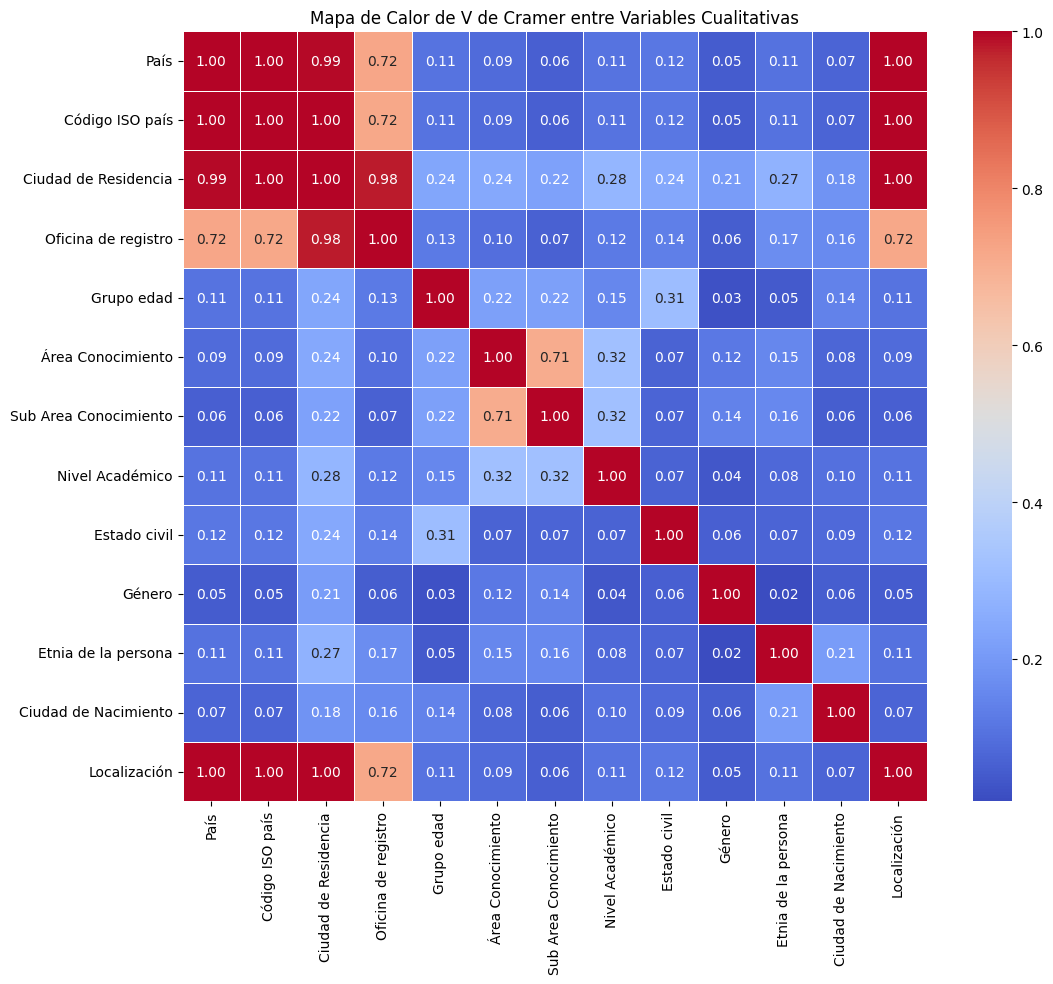

In [43]:
plt.figure(figsize=(12, 10))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de Calor de V de Cramer entre Variables Cualitativas")
plt.show()

##*Las relaciones que existen no se consideran relevantes, debido a que la ciudad de residencia, la oficina de registro y la localización, tienden a ser la misma por ende se evidencia una elevada correlación pero no es información que se considere de importancia, al igual que el área del conocimiento y el sub área del conocimiento, entreo otros.*

##**22. Se realizan gráficos de violín, para evidenciar relaciónes existentes entre variables cuantitavivas (edad) y cualitativas.**


Analizando relaciones entre variables Cuantitativas y Cualitativas:

--- Analizando 'Edad (años)' ---

Relación entre 'Edad (años)' y 'Grupo edad':
   Método: Prueba t para Muestras Independientes
   Estadístico T: 956.2014, P-valor: 0.0000
   Conclusión: Existe una diferencia estadísticamente significativa en las medias.

Relación entre 'Edad (años)' y 'Área Conocimiento':


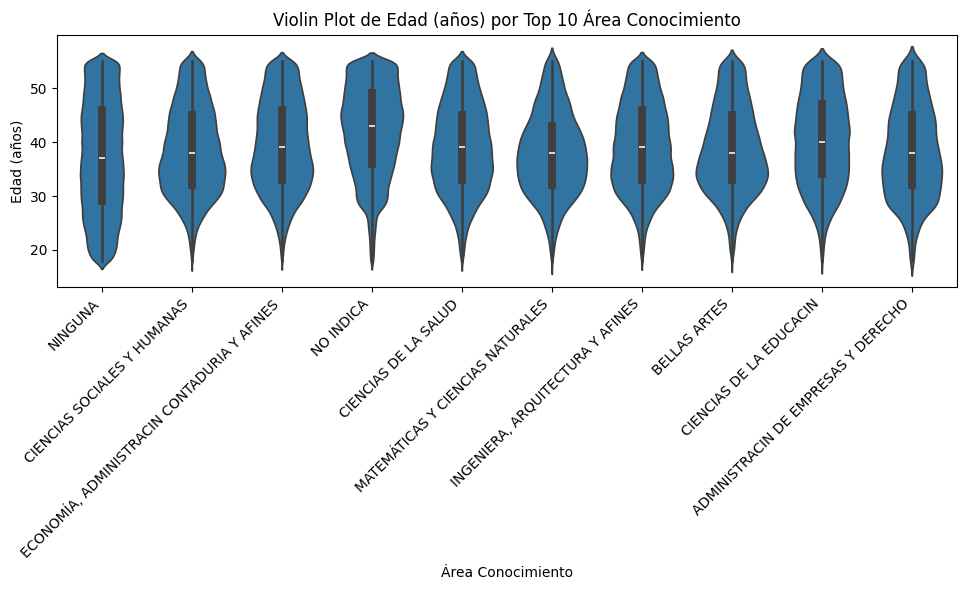


Relación entre 'Edad (años)' y 'Nivel Académico':


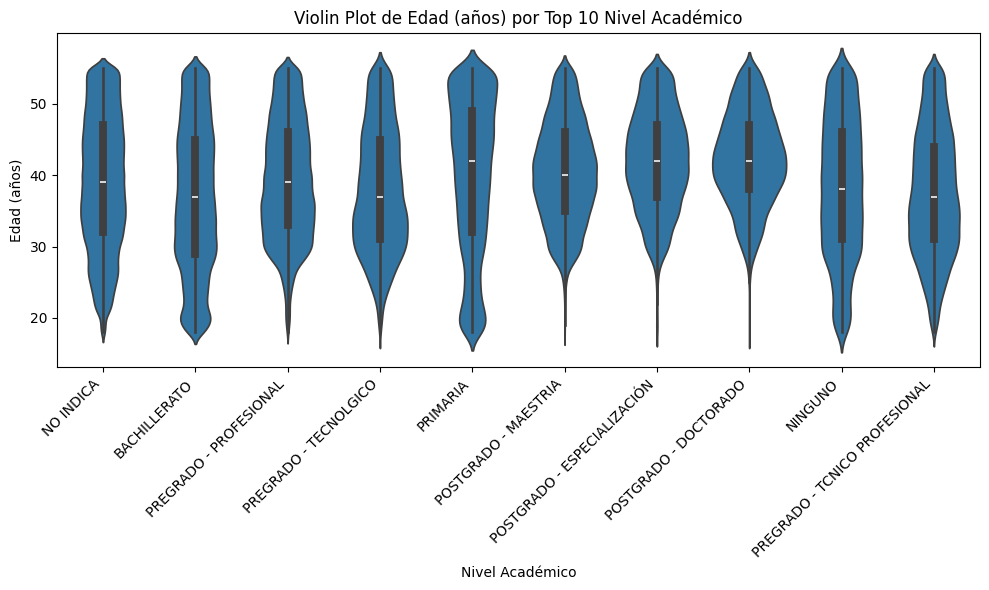


Relación entre 'Edad (años)' y 'Estado civil':


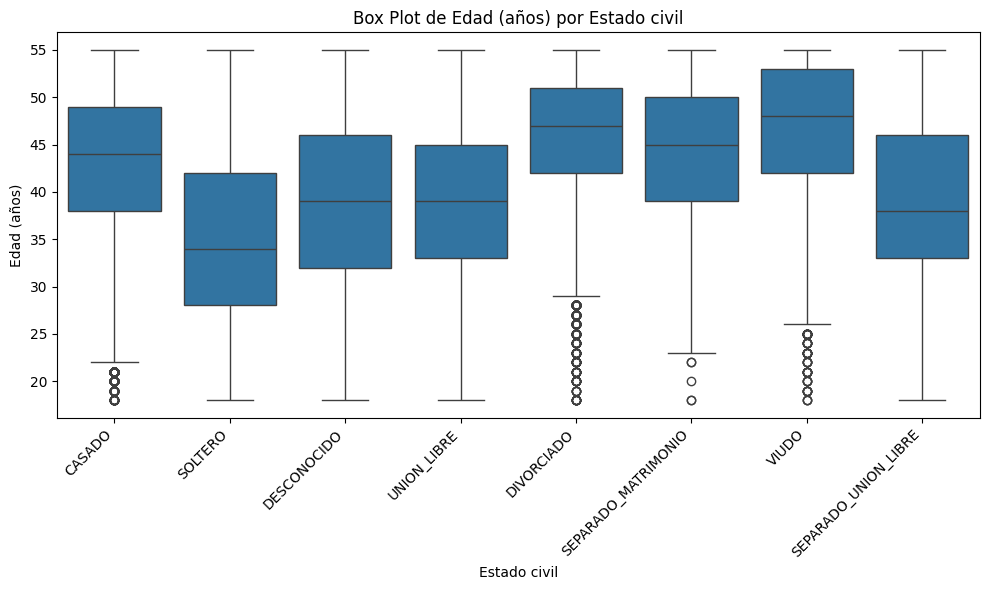


Relación entre 'Edad (años)' y 'Género':
   Método: ANOVA de un Factor
   Estadístico F: 804.5058, P-valor: 0.0000
   Conclusión: Existe una diferencia estadísticamente significativa en las medias.

Relación entre 'Edad (años)' y 'Etnia de la persona':


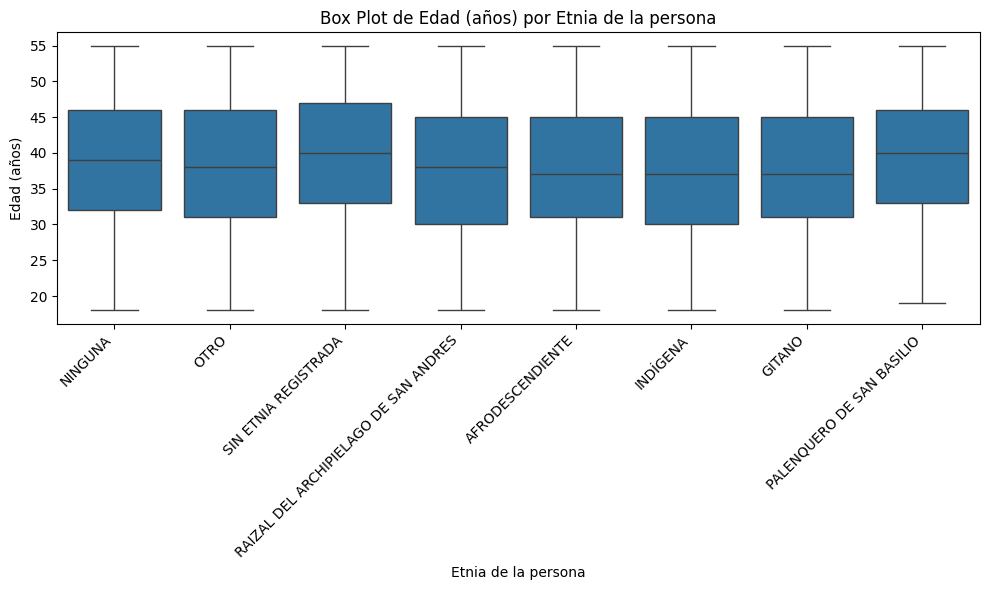


Relación entre 'Edad (años)' y 'País':


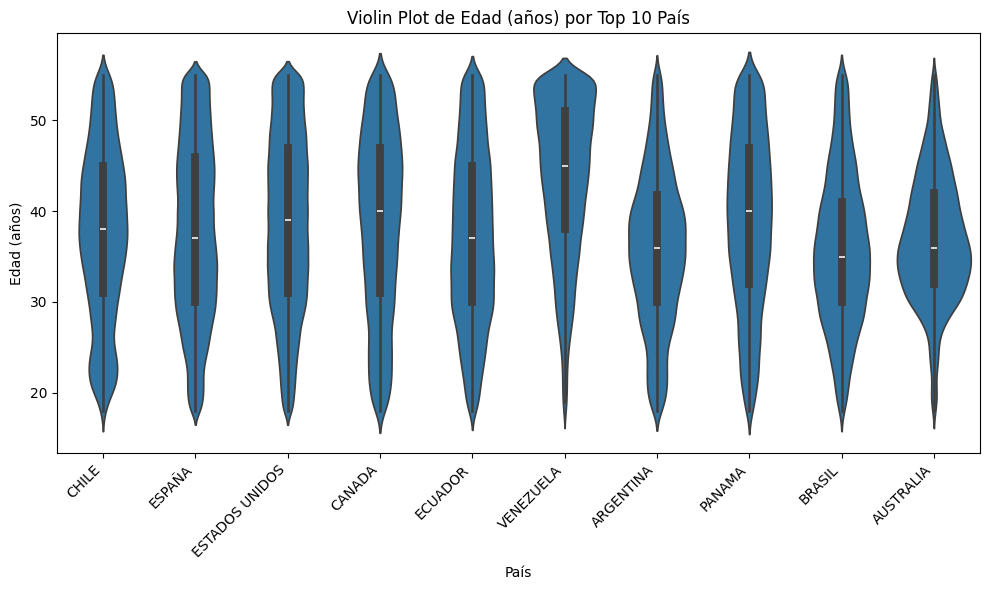


--- Análisis de 'Cantidad de personas' ---
Nota: 'Cantidad de personas' tiene un valor constante de 1 en este conjunto de datos filtrado.
Las pruebas estadísticas y visualizaciones para esta variable no mostrarán una variación significativa.


In [45]:
from scipy.stats import ttest_ind, f_oneway                                     # Importa las funciones para la prueba t de Student y ANOVA.
import matplotlib.pyplot as plt                                                 # Importa la librería para crear gráficos.
import seaborn as sns                                                           # Importa la librería para visualización de datos.

print("\nAnalizando relaciones entre variables Cuantitativas y Cualitativas:")  # Muestra un encabezado informativo.
columnas_cuantitativas = ['Edad (años)']                                        # Define las columnas cuantitativas a analizar.

for quant_col in columnas_cuantitativas:                                        # Itera sobre cada columna cuantitativa seleccionada.
    print(f"\n--- Analizando '{quant_col}' ---")                                # Imprime el nombre de la columna en análisis.
    if quant_col in analysis_methods:                                           # Verifica si existen métodos de análisis definidos para la columna.
        columnas_cualitativas = ['Grupo edad', 'Área Conocimiento', 'Nivel Académico', 'Estado civil', 'Género', 'Etnia de la persona', 'País']

        for qual_col in columnas_cualitativas:                                  # Itera sobre cada columna cualitativa.

            if qual_col in analysis_methods[quant_col]:                         # Verifica si existen métodos para la combinación de columna cuantitativa y cualitativa.
                method = analysis_methods[quant_col][qual_col]["method"]        # Extrae el nombre del método de análisis.
                num_categorias = df8[qual_col].nunique()                        # Cuenta las categorías únicas en la columna cualitativa.
                print(f"\nRelación entre '{quant_col}' y '{qual_col}':")        # Imprime la relación que se está evaluando.

                if method == "ANOVA or t-test (if 2 categories)":               # Lógica para pruebas estadísticas.
                    grupos = [df8[df8[qual_col] == cat][quant_col].dropna() for cat in df8[qual_col].unique()]#Crea grupos de datos para cada categoría cualitativa.
                    grupos_validos= [grupo for grupo in grupos if len(grupo)>1] #Filtra los grupos que tienen datos suficientes para el análisis.

                    if num_categorias == 2 and len(grupos_validos) == 2:         # Aplica prueba t si hay 2 categorías y datos.
                        stat, p_value = ttest_ind(grupos_validos[0], grupos_validos[1]) # Realiza la prueba t.
                        print(f"   Método: Prueba t para Muestras Independientes")
                        print(f"   Estadístico T: {stat:.4f}, P-valor: {p_value:.4f}")
                    elif num_categorias > 2 and len(grupos_validos) > 1:        # Aplica ANOVA si hay más de 2 categorías.
                        stat, p_value = f_oneway(*grupos_validos)               # Realiza la prueba ANOVA de un factor.
                        print(f"   Método: ANOVA de un Factor")
                        print(f"   Estadístico F: {stat:.4f}, P-valor: {p_value:.4f}")
                    else:                                                       # Si no se cumplen las condiciones para las pruebas.
                        print("   No hay suficientes datos o grupos para realizar una prueba estadística.")
                        continue                                                # Pasa a la siguiente iteración del bucle.

                    if 'p_value' in locals() and p_value < 0.05:                # Muestra la conclusión basada en el p-valor.
                        print("   Conclusión: Existe una diferencia estadísticamente significativa en las medias.")
                    elif 'p_value' in locals():
                        print("   Conclusión: No hay una diferencia estadísticamente significativa en las medias.")
                elif method == "Box plot or Violin plot":                       # Lógica para visualización.
                    plt.figure(figsize=(10, 6))                                 # Crea la figura para el gráfico.

                    if num_categorias <= 10:                                    # Usa un box plot si hay 10 o menos categorías.
                        sns.boxplot(x=qual_col, y=quant_col, data=df8)
                        plt.title(f'Box Plot de {quant_col} por {qual_col}')
                    else:                                                       # Usa un violin plot para más de 10 categorías.
                        top_10 = df8[qual_col].value_counts().nlargest(10).index # Selecciona las 10 categorías principales.
                        df_subset = df8[df8[qual_col].isin(top_10)]             # Filtra el DataFrame con las categorías seleccionadas.
                        sns.violinplot(x=qual_col, y=quant_col, data=df_subset)
                        plt.title(f'Violin Plot de {quant_col} por Top 10 {qual_col}')
                    plt.xticks(rotation=45, ha='right')                         # Configura los detalles del gráfico.
                    plt.xlabel(qual_col)
                    plt.ylabel(quant_col)
                    plt.tight_layout()
                    plt.show()

if 'Cantidad de personas' in analysis_methods and 'Cantidad de personas' not in columnas_cuantitativas: # Maneja el caso de la columna 'Cantidad de personas'.
    print("\n--- Análisis de 'Cantidad de personas' ---")
    print("Nota: 'Cantidad de personas' tiene un valor constante de 1 en este conjunto de datos filtrado.")
    print("Las pruebas estadísticas y visualizaciones para esta variable no mostrarán una variación significativa.")


##**23. Se realiza un gráfico de líneas, para visulizar la fecha de registro en función de la cantidad de registros.**


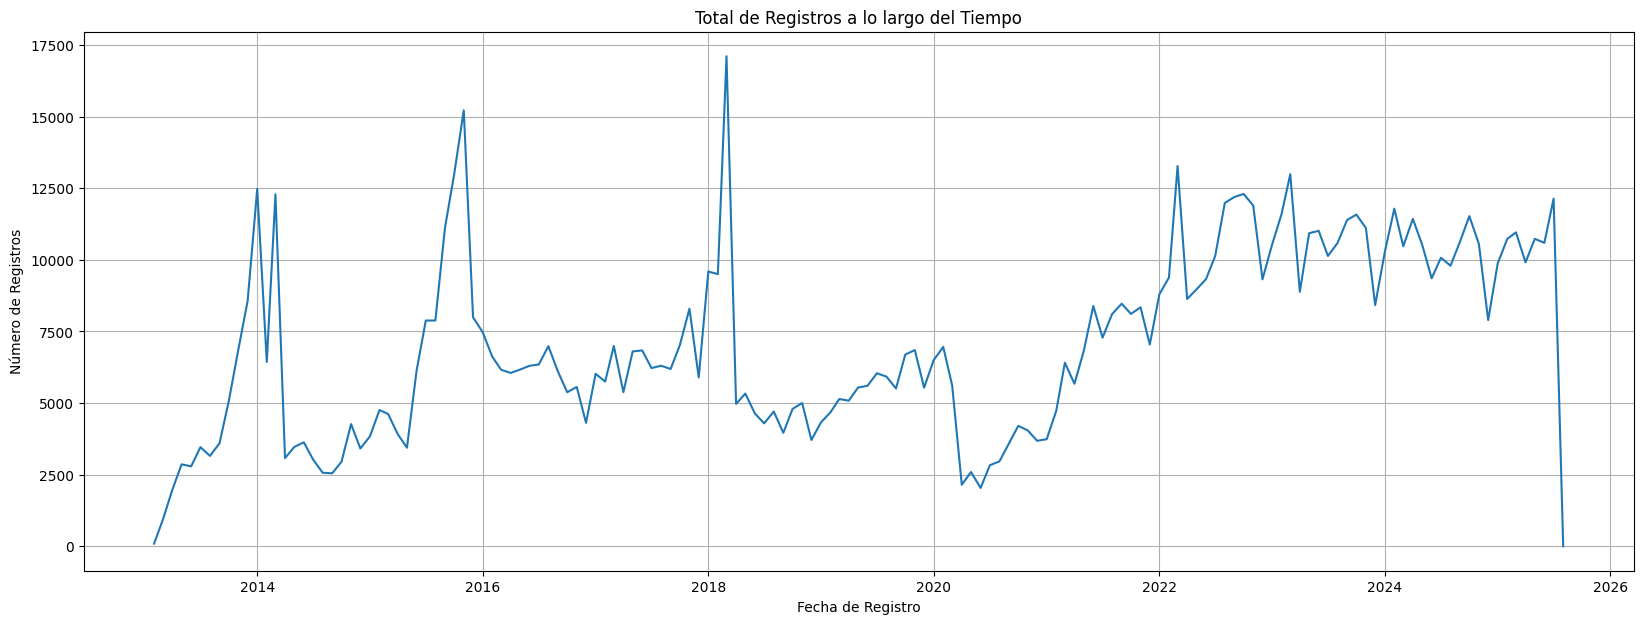

Data grouped by 'Fecha de Registro' and selected qualitative variables:

País data:


,Fecha de Registro,País,Count
0,2013-02-01,ESTADOS UNIDOS,88
1,2013-02-01,MEXICO,4
2,2013-02-01,REINO UNIDO,1
3,2013-03-01,ALEMANIA,37
4,2013-03-01,ARABIA SAUDITA,1



Grupo edad data:


,Fecha de Registro,Grupo edad,Count
0,2013-02-01,ADULTO,93
1,2013-03-01,ADULTO,913
2,2013-03-01,ADULTO JOVEN,3
3,2013-04-01,ADULTO,1957
4,2013-04-01,ADULTO JOVEN,14



Género data:


,Fecha de Registro,Género,Count
0,2013-02-01,DESCONOCIDO,1
1,2013-02-01,FEMENINO,57
2,2013-02-01,MASCULINO,35
3,2013-03-01,FEMENINO,487
4,2013-03-01,MASCULINO,429


In [49]:
# 1. Group by 'Fecha de Registro' and count records
registros_por_fecha = df8.groupby('Fecha de Registro').size().reset_index(name='Total Registros')

# 2. Create a line plot for the total trend over time
plt.figure(figsize=(20, 7))
sns.lineplot(x='Fecha de Registro', y='Total Registros', data=registros_por_fecha)
plt.title('Total de Registros a lo largo del Tiempo')
plt.xlabel('Fecha de Registro')
plt.ylabel('Número de Registros')
plt.grid(True)
plt.show()

# 3. Group by 'Fecha de Registro' and selected qualitative variables
qualitative_vars_time_analysis = ['País', 'Grupo edad', 'Género']
time_series_data = {}

for col in qualitative_vars_time_analysis:
    # Group by date and the qualitative column, then count
    grouped_data = df8.groupby(['Fecha de Registro', col]).size().reset_index(name='Count')
    time_series_data[col] = grouped_data

# Prepare for stacked bar charts in the next step
print("Data grouped by 'Fecha de Registro' and selected qualitative variables:")
for col, data in time_series_data.items():
    print(f"\n{col} data:")
    display(data.head())

## *Resumen de los gráficos.*

1) Edad y Área de Conocimiento:
El gráfico de violín sugiere que la distribución de la edad es similar en las 10 principales áreas de conocimiento analizadas. Las medidas de tendencia central y la forma de los datos son consistentes en todas las categorías, lo que indica que no hay una diferencia drástica en las edades entre las áreas.

2) Edad y Nivel Académico:
El gráfico de violín muestra que existe una correlación entre la edad y el nivel académico. Las personas con estudios de posgrado tienden a ser de mayor edad y tienen una distribución de edad más amplia. En contraste, los niveles académicos más bajos, como bachillerato y pregrado, se concentran en rangos de edad más jóvenes.

3)Edad y Estado civil:
El box plot muestra una clara relación entre el estado civil y la edad. Las personas divorciadas, separadas y viudas tienen una edad promedio significativamente más alta, mientras que las solteras y en unión libre son las más jóvenes. Se observan valores atípicos, como personas casadas o viudas a edades inusualmente jóvenes.

4) Edad y Étnia:
Se puede evidenciar que la edad de las personas no varía significativamente según su etnia. El rango de edad, la mediana y los valores atípicos son muy similares en todas las categorías étnicas mostradas.

5) Edad y Pais:
El análisis del gráfico de violín revela que la edad de las personas no varía de manera significativa en función de su país de origen. La distribución de la edad es notablemente similar en todos los 10 países con más registros analizados.

6)Total de Registros a lo largo del tiempo:
 Se puede concluir que la cantidad de registros ha tenido una tendencia general al alza con picos y valles significativos a lo largo de los años. Se observan picos muy altos en 2014, 2016 y 2018, seguidos de caídas notables, pero la tendencia general sigue un patrón ascendente a largo plazo.

*En conclusión:*

Los hallazgos demuestran que la edad de las personas está fuertemente correlacionada con su nivel académico y su estado civil, pero no muestra una relación significativa con el área de conocimiento, la etnia o el país. Además, el total de registros ha mostrado una tendencia general al alza a lo largo del tiempo, con picos y caídas periódicas.

Dado que la edad es un factor clave, se pueden crear campañas o programas dirigidos a grupos de edad específicos según su nivel académico y estado civil. Por ejemplo, una estrategia para personas con posgrado podría enfocarse en un rango de edad mayor y en estados civiles como "casado" o "divorciado". Además de esto, es fundamental investigar las causas de los picos en el total de registros (2014, 2016, 2018) y sus posteriores caídas. Comprender estos factores (por ejemplo, lanzamientos de productos, eventos masivos, o particularmente cambios en políticas) podría ayudar a replicar el éxito y mitigar las caídas en el futuro. Se puede agregar, que el hecho de que la etnia y el país no influyan en la edad es un hallazgo importante. Esto podría indicar que las estrategias de marketing o comunicación no necesitan ser adaptadas en función de estas variables demográficas si el objetivo es atraer a un rango de edad similar en diferentes grupos.